Analyse de données et estimation du prix de biens immobiliers

fichier de données : house_price_data.csv

variables descriptives X : caractéristiques des biens immobiliers (cf description_data.txt)

variable cible Y : prix des biens immobiliers

- Explorer et comprendre les données
- Nettoyer les données, missing values et outliers
- Choisir les bonnes variables pour l'entraînement du modèle, distribution et corrélation
- Réduire le nombre de variables en combinant des colonnes
- Transformer les données, scaling et encoding

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
pd.set_option('display.max_columns', None)

# Charger les données dans un dataframe

In [7]:
maisons = pd.read_csv('./House_price.csv')
maisons.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Afficher le nombre de lignes et de colonnes

In [8]:
maisons.shape

(1460, 81)

Afficher le nom des colonnes


In [9]:
maisons.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Affiche le nombre de lignes dupliquées


In [10]:
maisons.duplicated().sum()

0

Affiche le nombre de valeurs manquantes par colonne

In [11]:
maisons.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Afficher les ventes par rapport aux prix

<Axes: ylabel='SalePrice'>

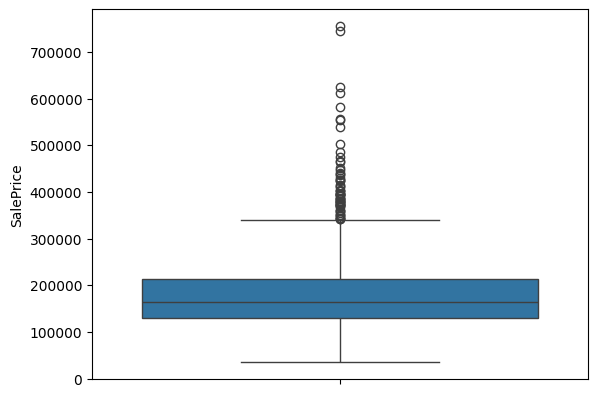

In [12]:
sns.boxplot(maisons['SalePrice'])

On remarque que certaines maisons dépasse 500k elles peuvent etre considérer comme valeurs abérrantes donc on les affiches


In [13]:
maisons[maisons['SalePrice'] > 500000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
178,179,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,748.0,Ex,TA,PConc,Ex,TA,No,GLQ,1904,Unf,0,312,2216,GasA,Ex,Y,SBrkr,2234,0,0,2234,1,0,2,0,1,1,Ex,9,Typ,1,Gd,Attchd,2009.0,Fin,3,1166,TA,TA,Y,0,60,0,0,0,0,NaN,NaN,NaN,0,7,2009,New,Partial,501837
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767,ALQ,539,788,3094,GasA,Ex,Y,SBrkr,2402,0,0,2402,1,0,2,0,2,1,Ex,10,Typ,2,Gd,Attchd,2008.0,Fin,3,672,TA,TA,Y,0,72,0,0,170,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,Norm,1Fam,2Story,8,5,2003,2003,Hip,CompShg,CemntBd,Wd Shng,BrkFace,603.0,Ex,TA,PConc,Gd,TA,Gd,ALQ,1416,Unf,0,234,1650,GasA,Ex,Y,SBrkr,1690,1589,0,3279,1,0,3,1,4,1,Ex,12,Mod,1,Gd,BuiltIn,2003.0,Fin,3,841,TA,TA,Y,503,36,0,0,210,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
803,804,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,424.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,1734,1734,GasA,Ex,Y,SBrkr,1734,1088,0,2822,0,0,3,1,4,1,Ex,12,Typ,1,Gd,BuiltIn,2009.0,RFn,3,1020,TA,TA,Y,52,170,0,0,192,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188,Unf,0,142,2330,GasA,Ex,Y,SBrkr,2364,0,0,2364,1,0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009.0,Fin,3,820,TA,TA,Y,0,67,0,0,0,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1046,1047,60,RL,85.0,16056,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,CemntBd,CmentBd,Stone,208.0,Gd,TA,PConc,Ex,TA,Av,GLQ,240,Unf,0,1752,1992,GasA,Ex,Y,SBrkr,1992,876,0,2868,0,0,3,1,4,1,Ex,11,Typ,1,Gd,BuiltIn,2005.0,Fin,3,716,TA,TA,Y,214,108,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,556581
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387,Unf,0,543,1930,GasA,Ex,Y,SBrkr,1831,1796,0,3627,1,0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,1995.0,Fin,3,807,TA,TA,Y,361,76,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,NaN,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


On stock seulement les maisons en bas de 500k

In [14]:
maisons_MoisChere = maisons = maisons[maisons['SalePrice'] < 500000]

# On vérifie si des maisons au dessus de 500k existe
maisons_MoisChere[maisons_MoisChere['SalePrice'] > 500000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [15]:
# On retire 3 colonnes qui ne servent pas beaucoup
maisons_clean = maisons_MoisChere.drop(['Street', 'Alley', 'LotShape'],axis=1)
maisons_clean

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Faire un scatter plot entre toutes les variables numériques et SalePrice


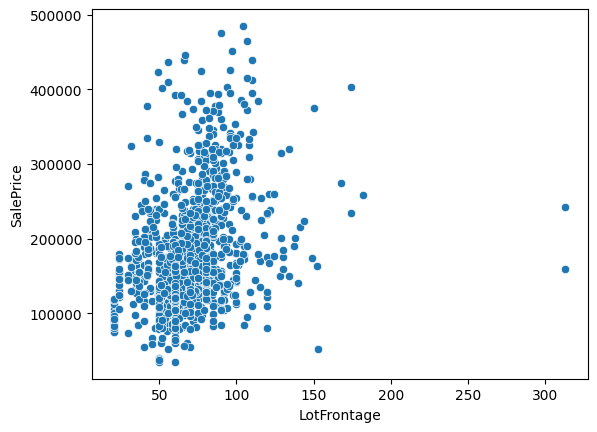

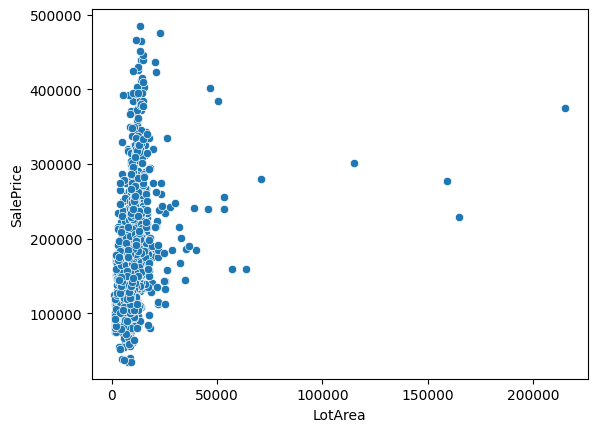

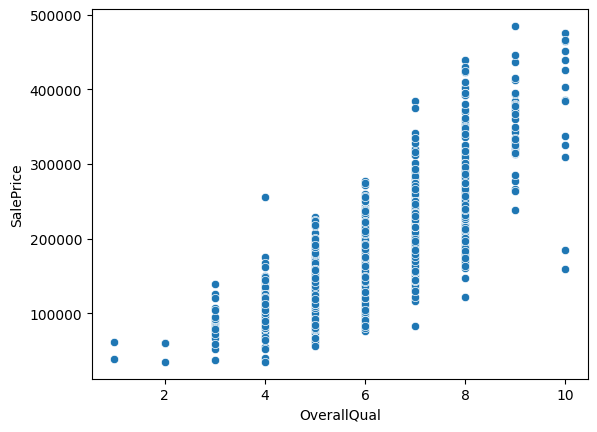

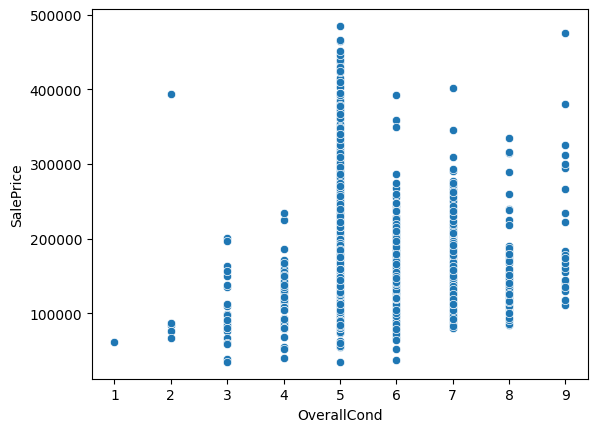

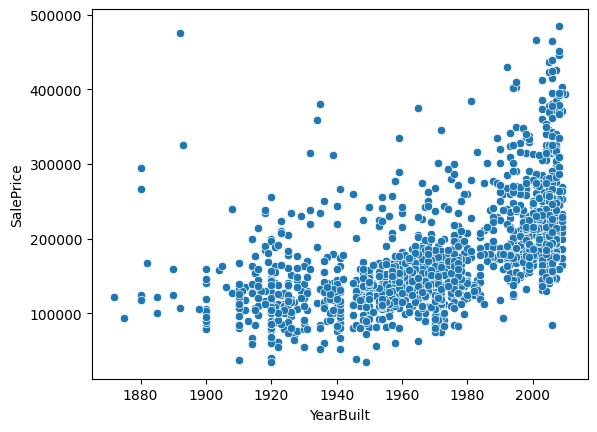

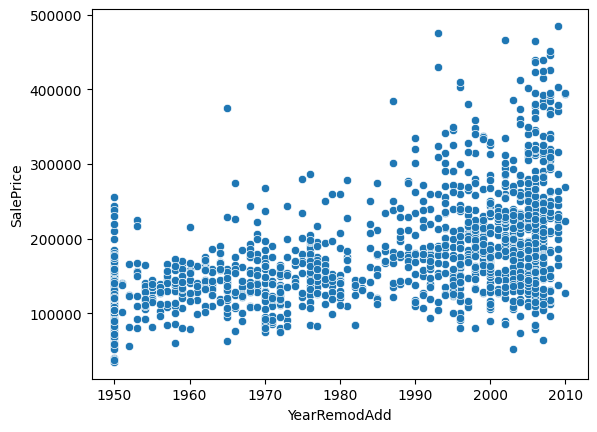

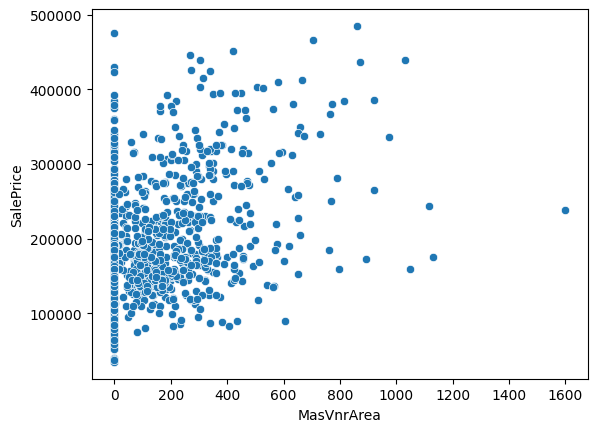

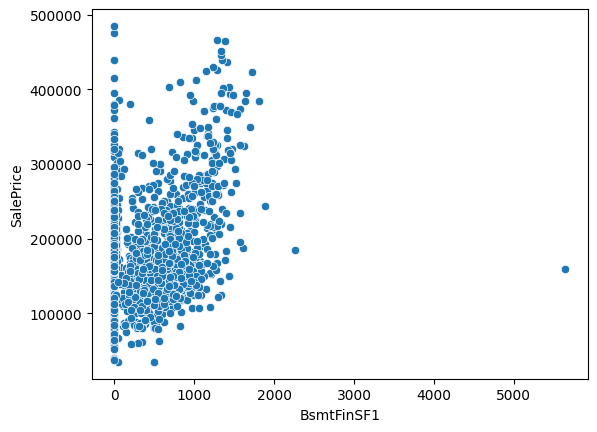

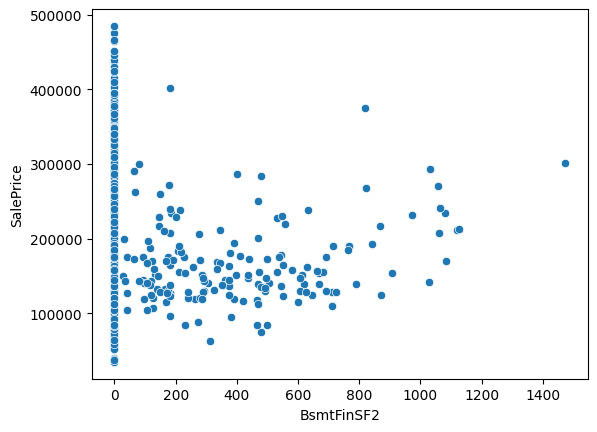

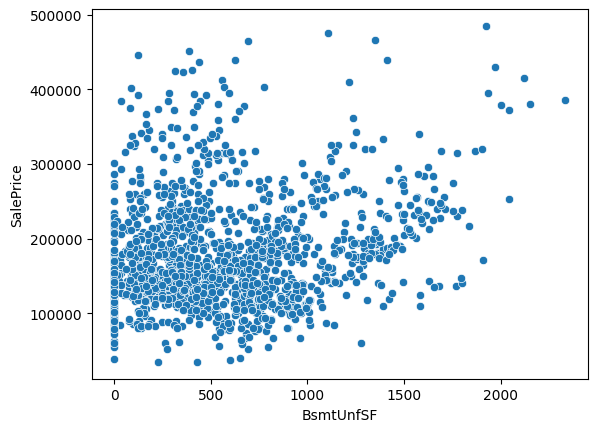

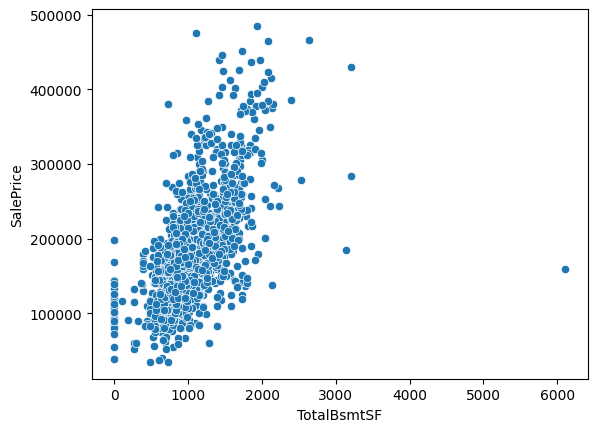

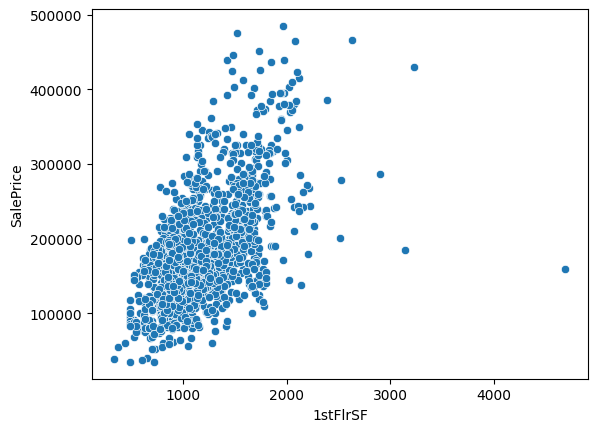

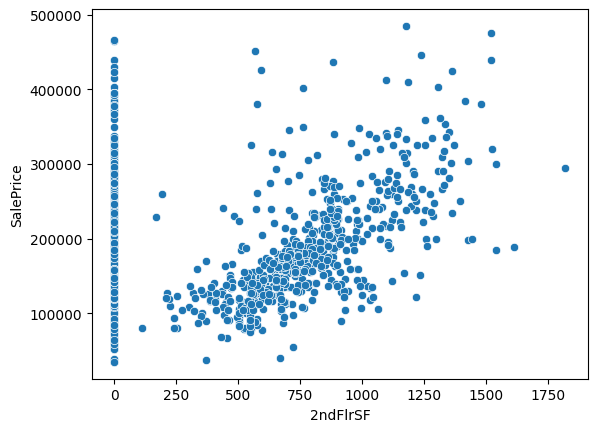

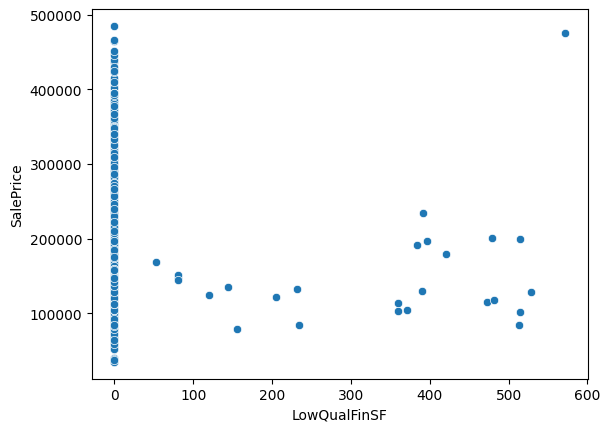

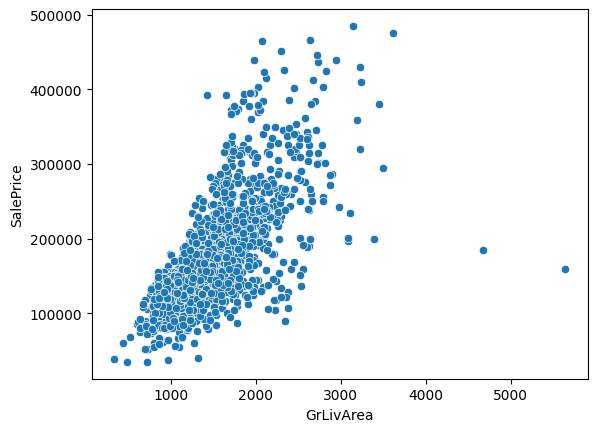

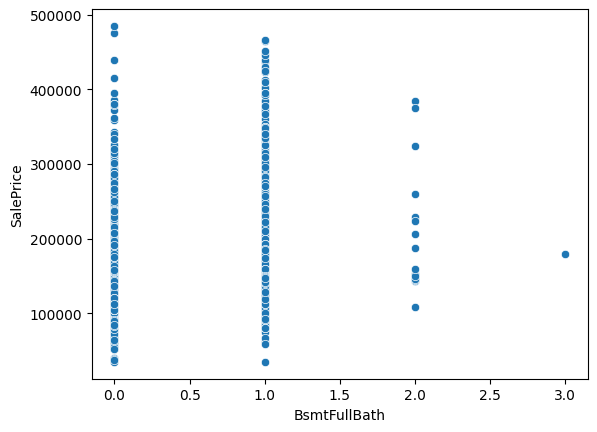

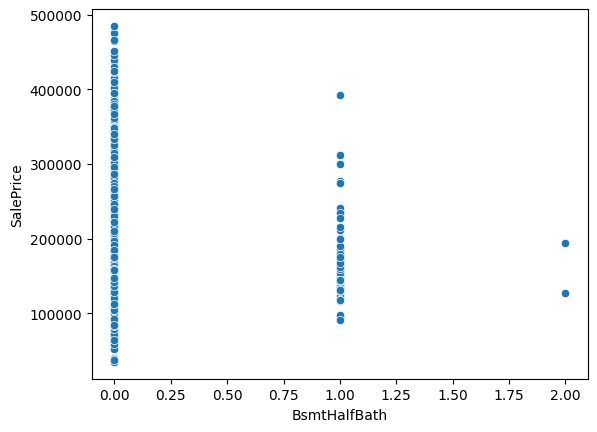

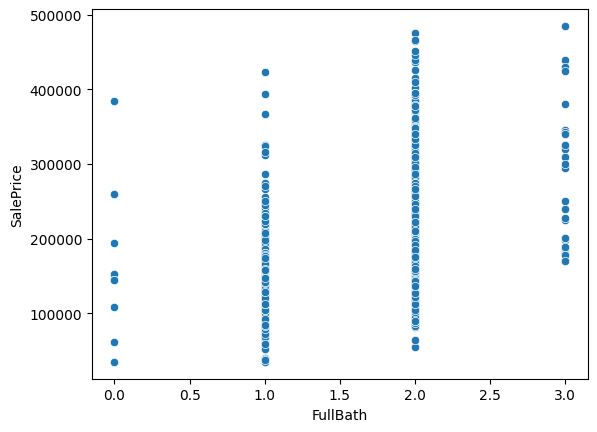

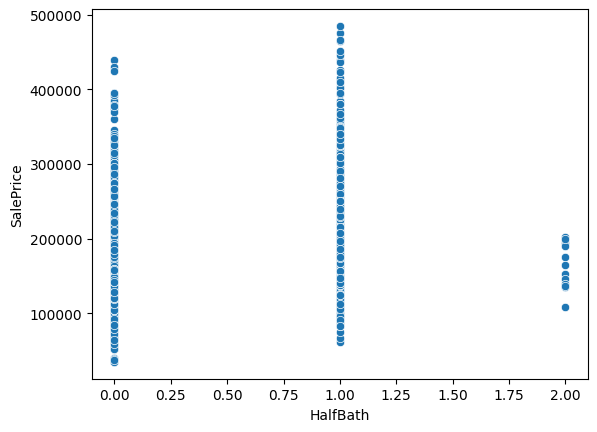

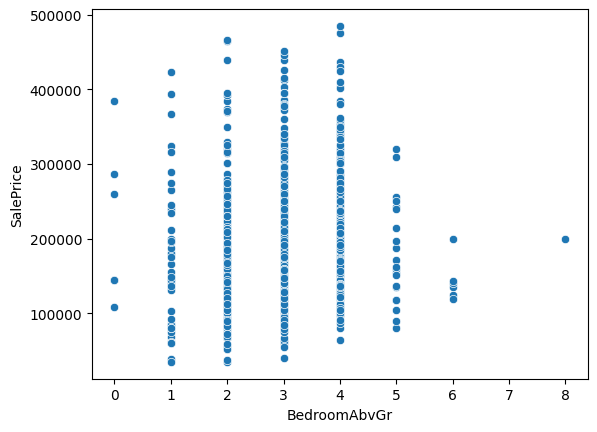

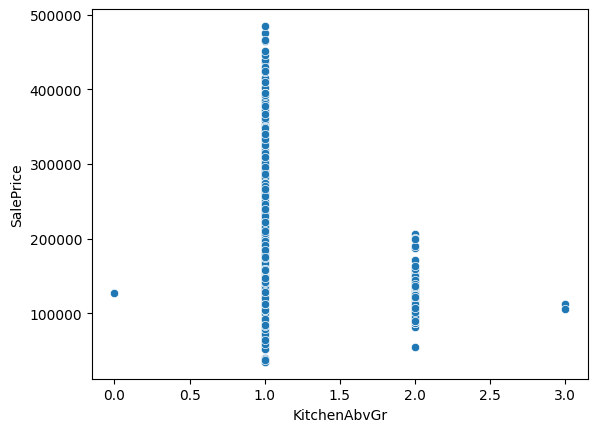

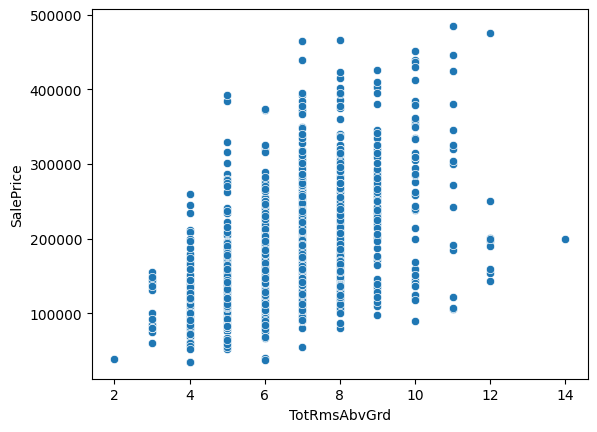

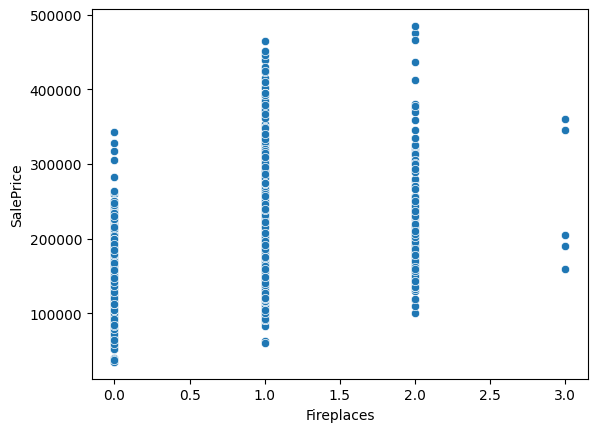

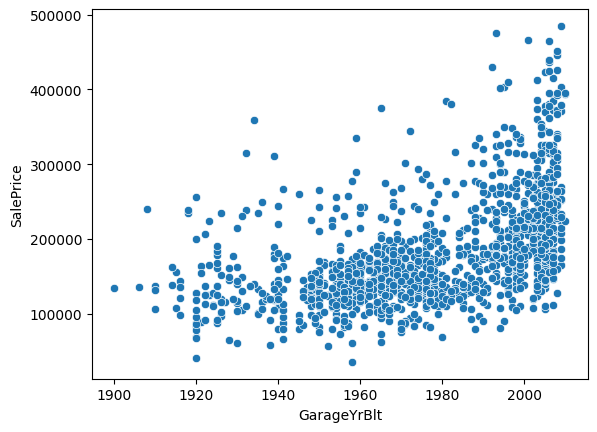

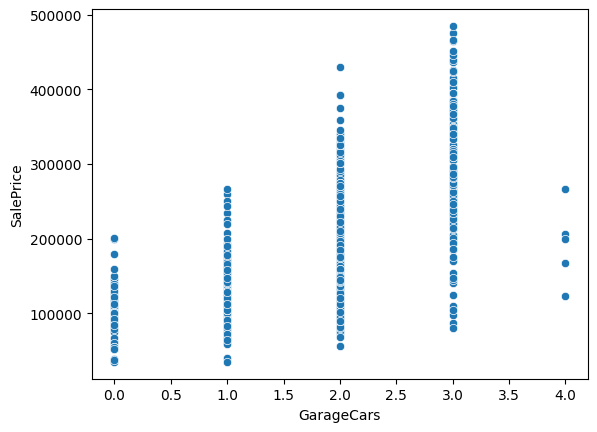

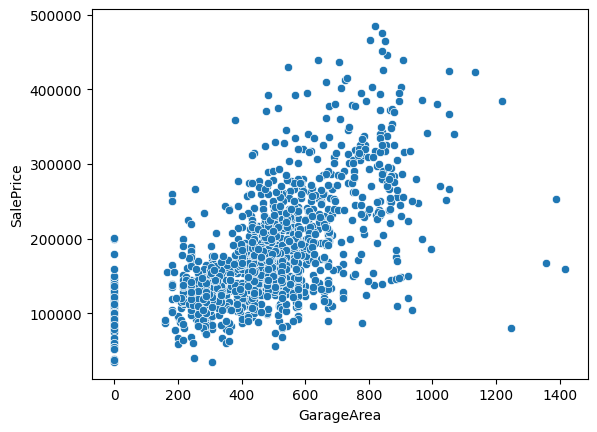

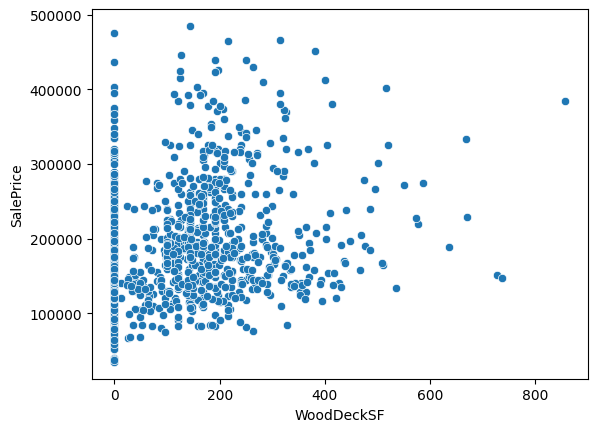

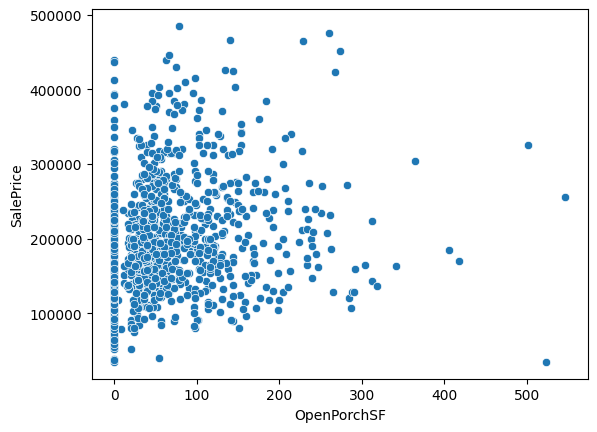

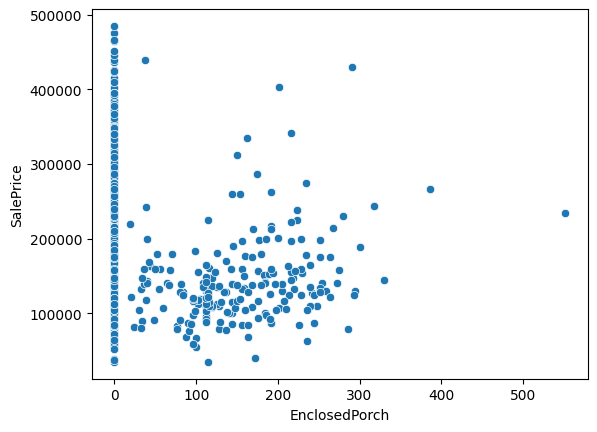

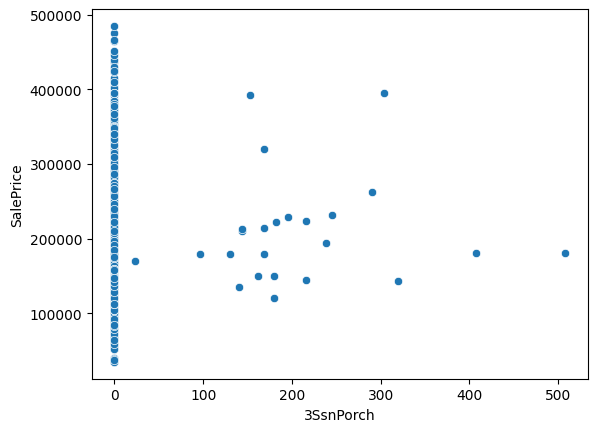

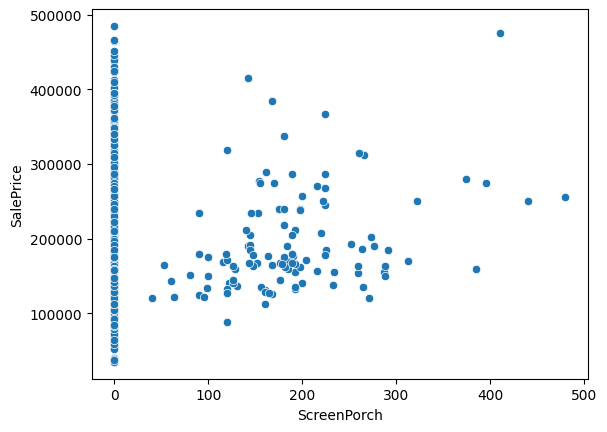

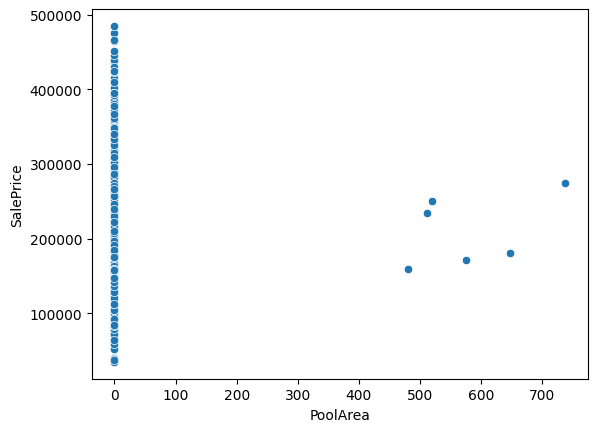

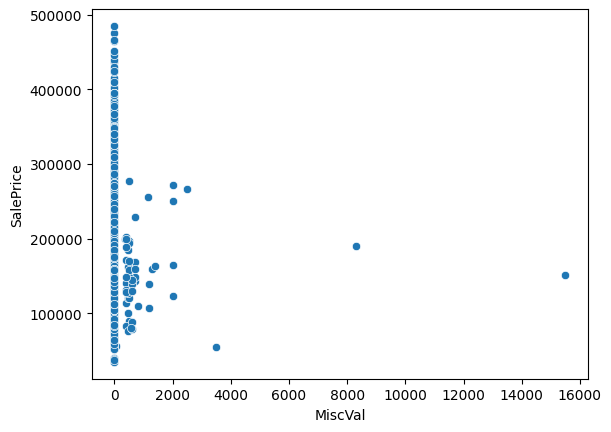

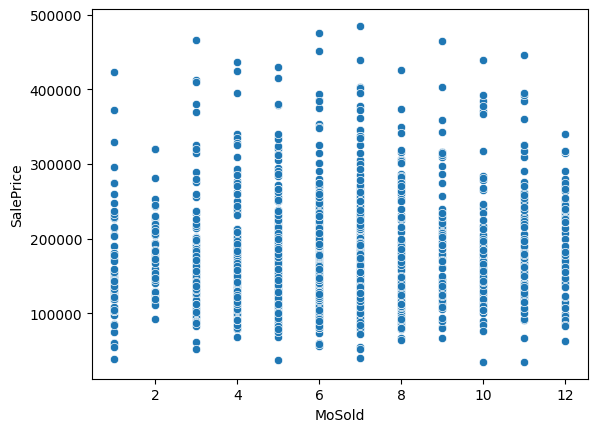

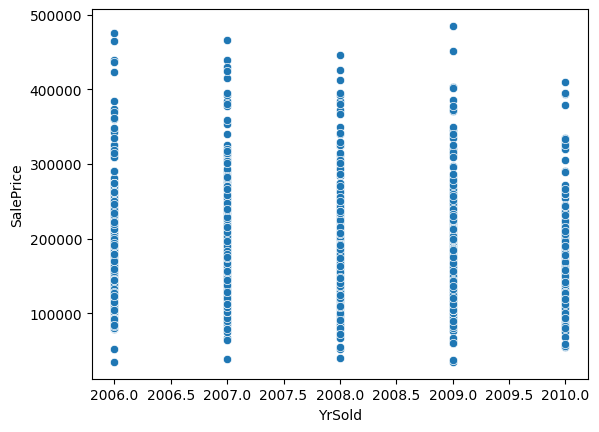

In [16]:
tableau_colonne_numérique = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

for colonne in tableau_colonne_numérique:
    sns.scatterplot(data=maisons_clean, x=colonne, y='SalePrice')
    plt.show()

Faire un scatter plot entre toutes les variables catégoriques et SalePrice

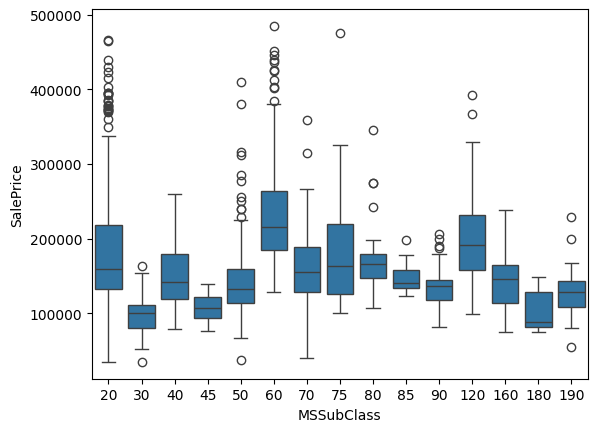

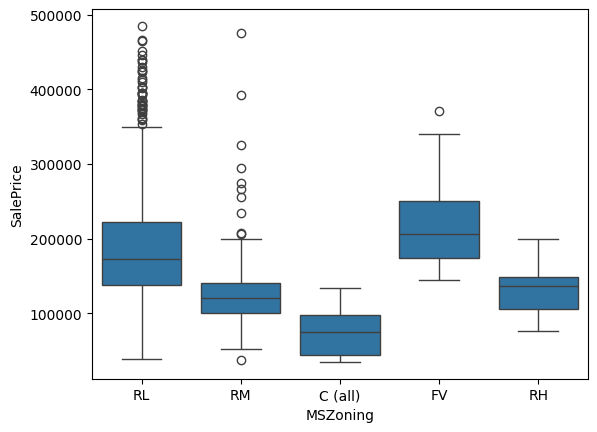

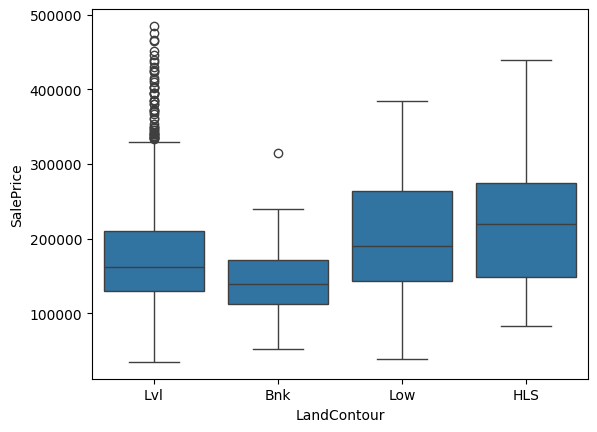

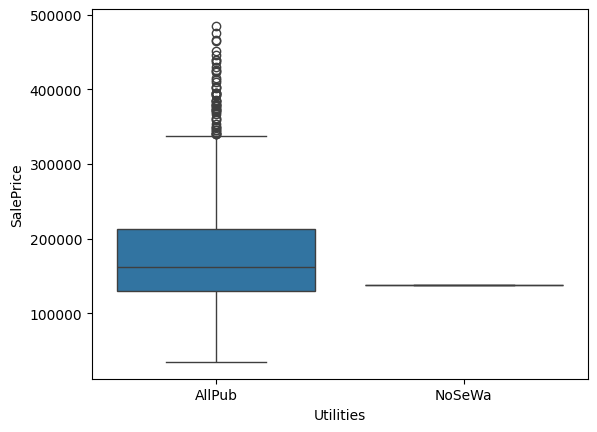

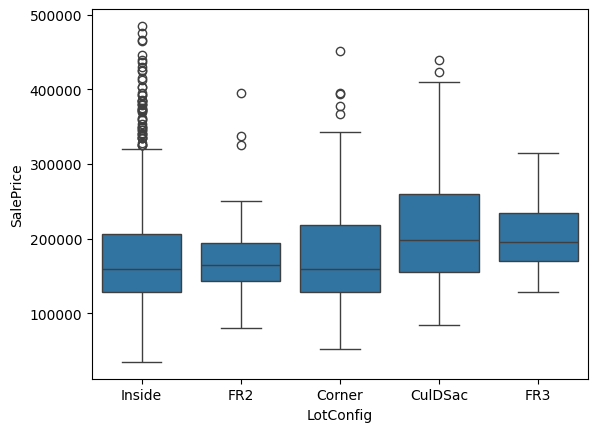

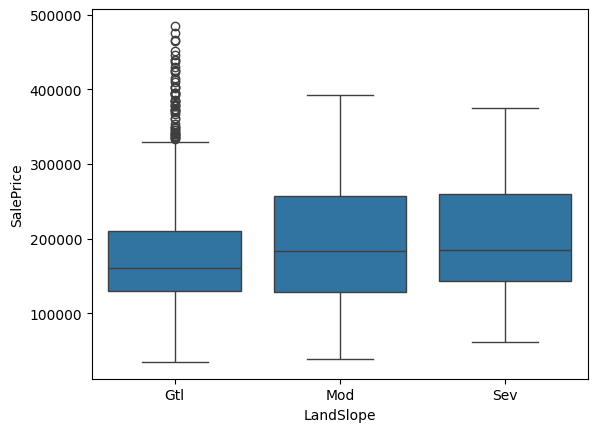

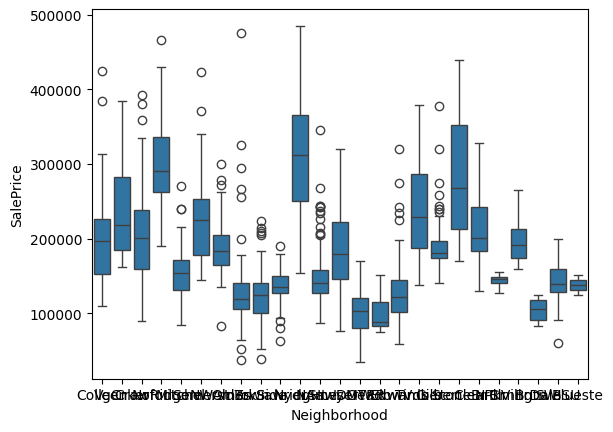

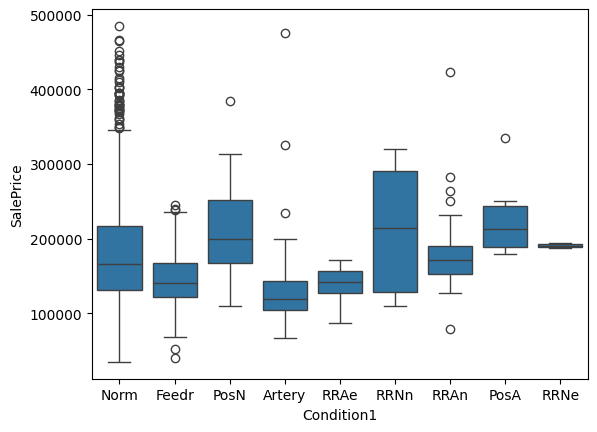

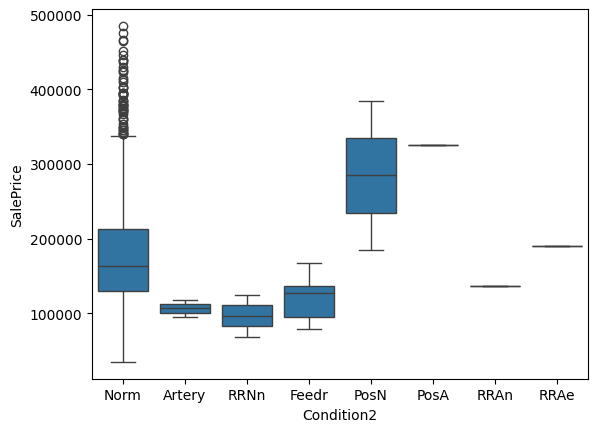

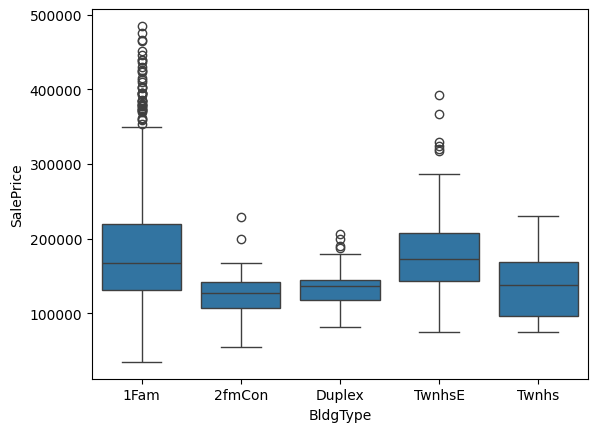

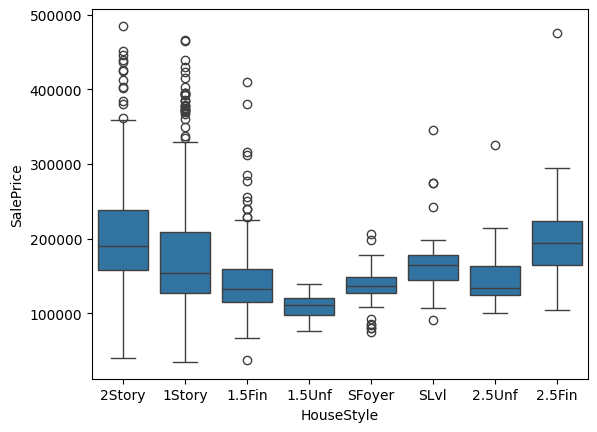

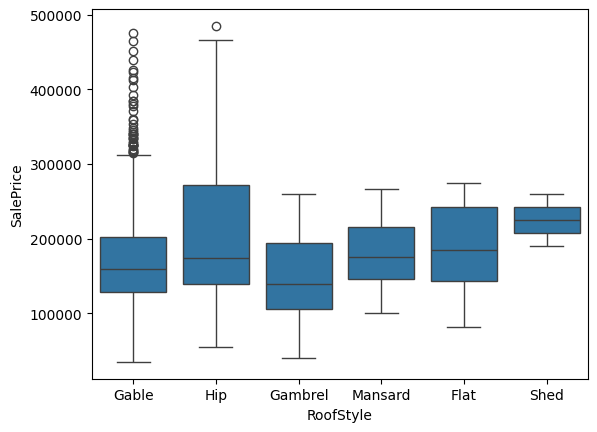

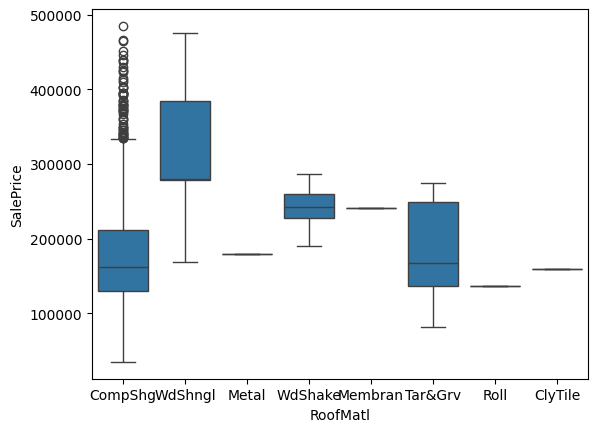

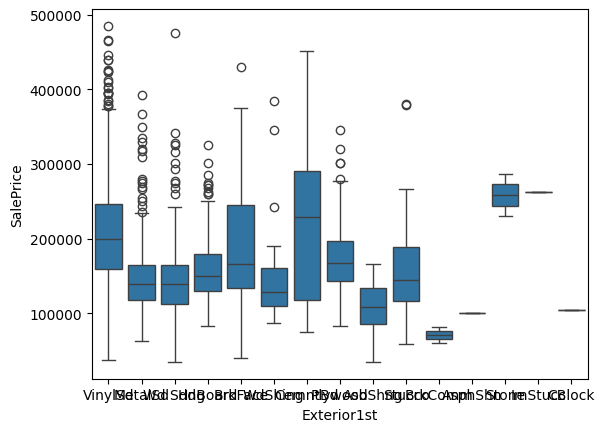

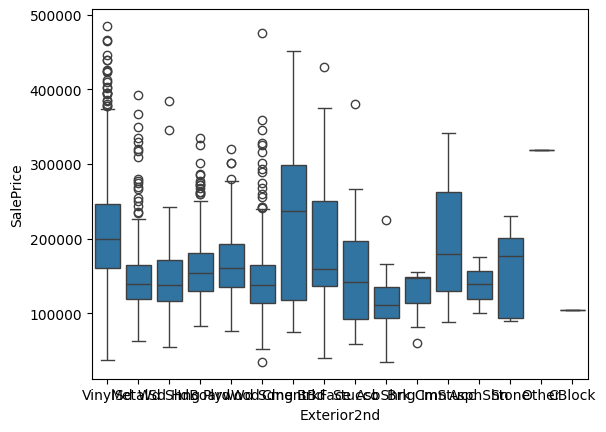

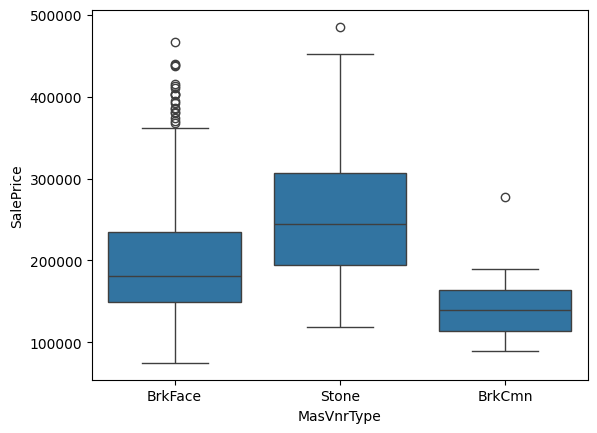

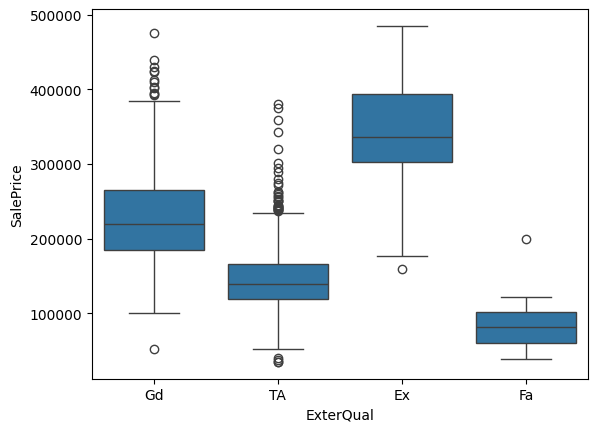

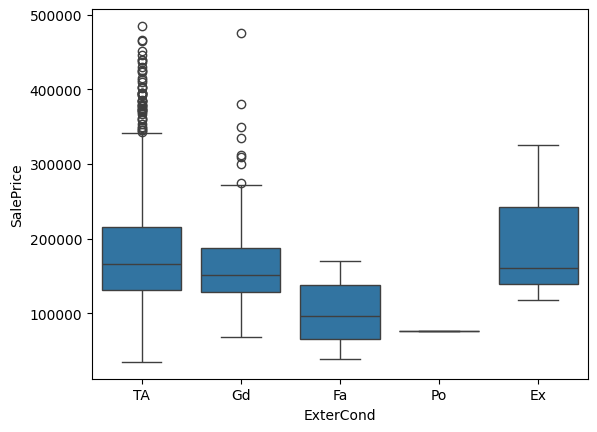

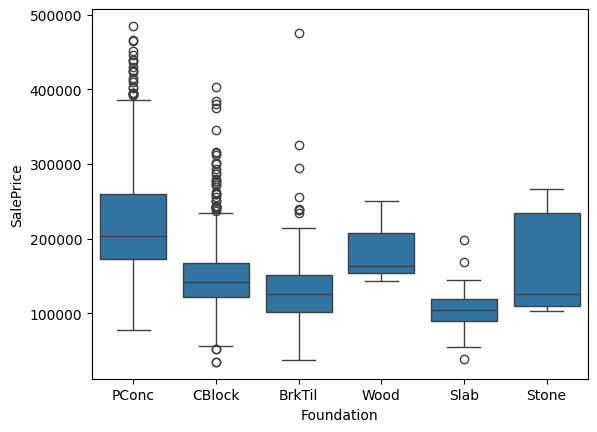

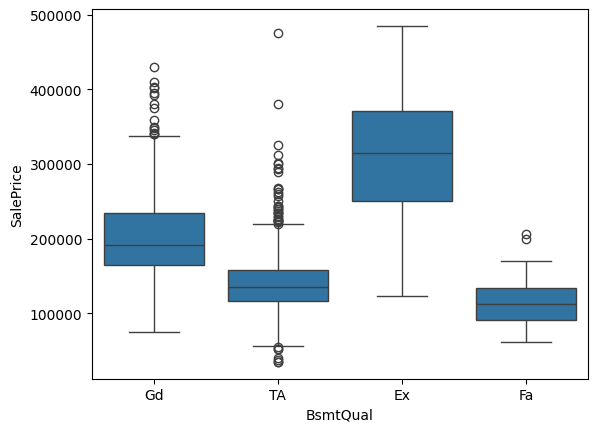

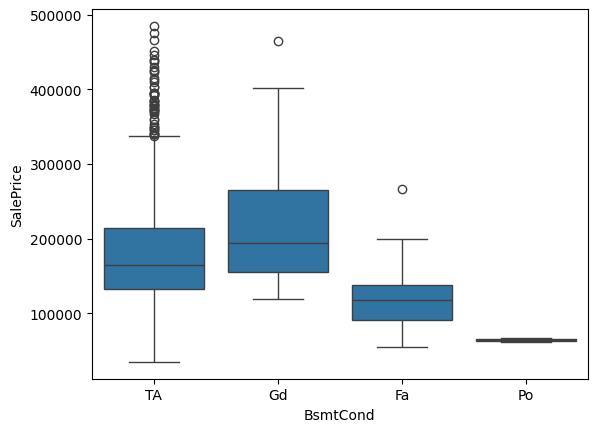

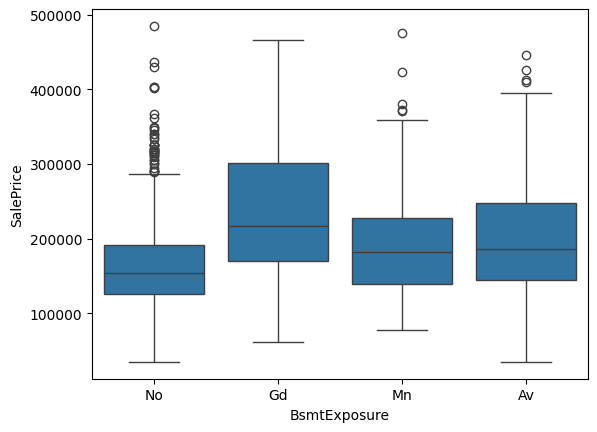

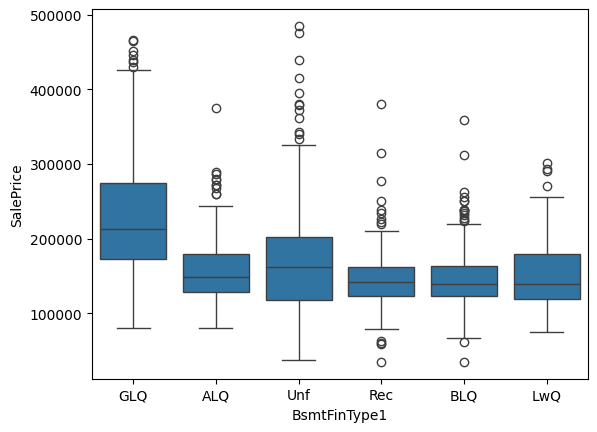

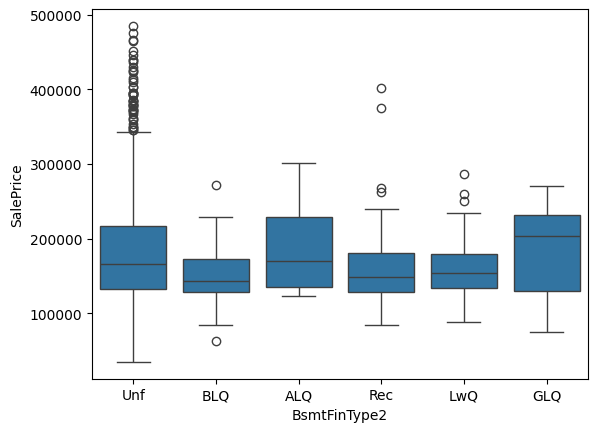

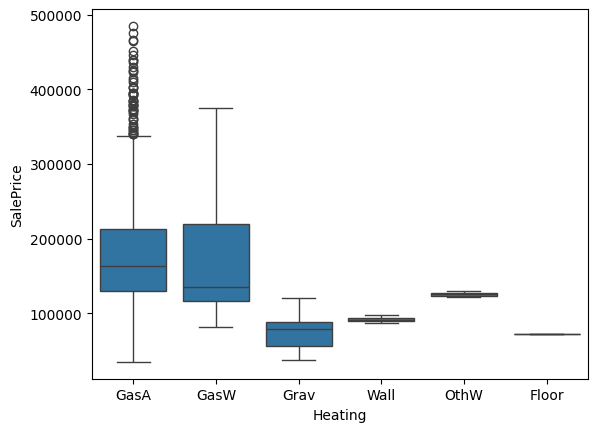

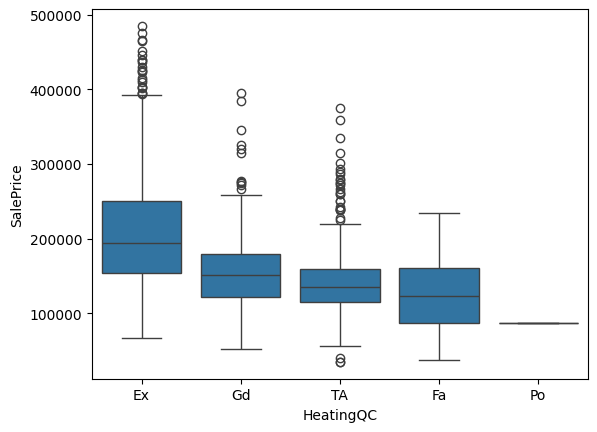

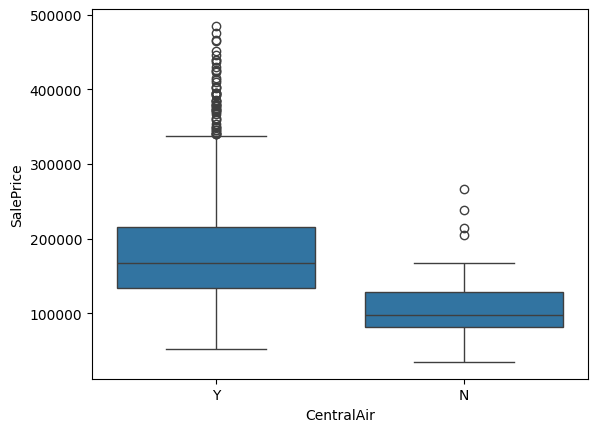

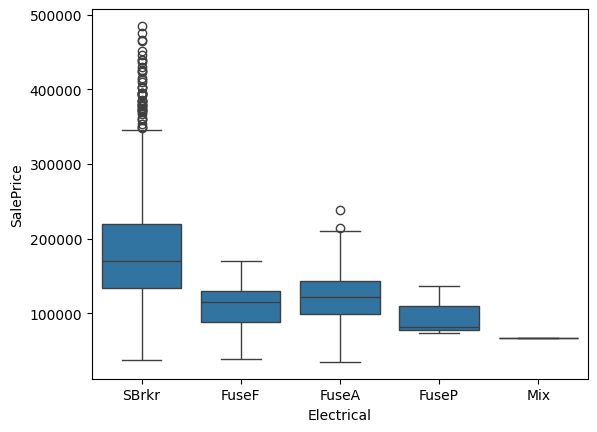

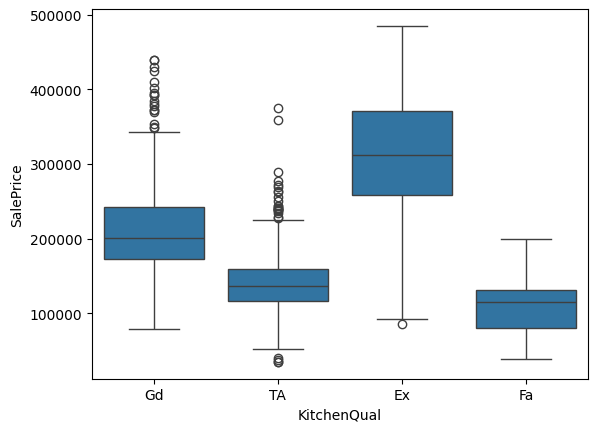

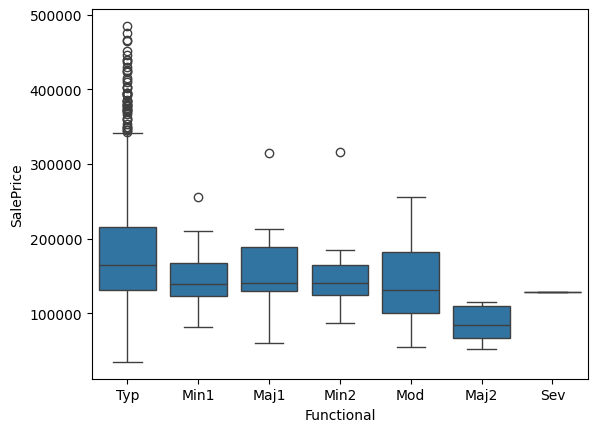

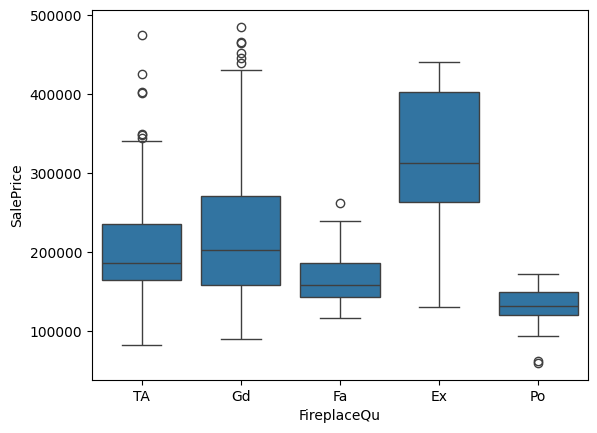

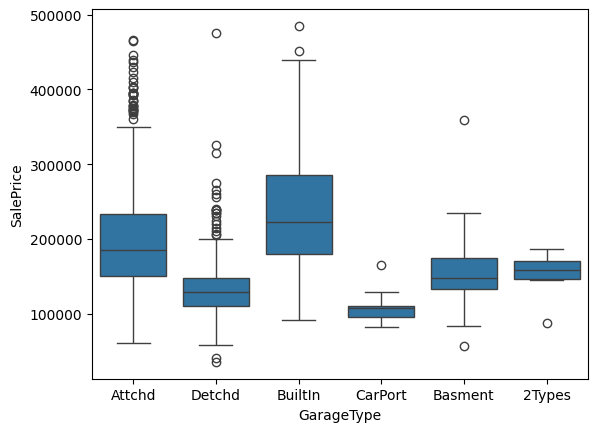

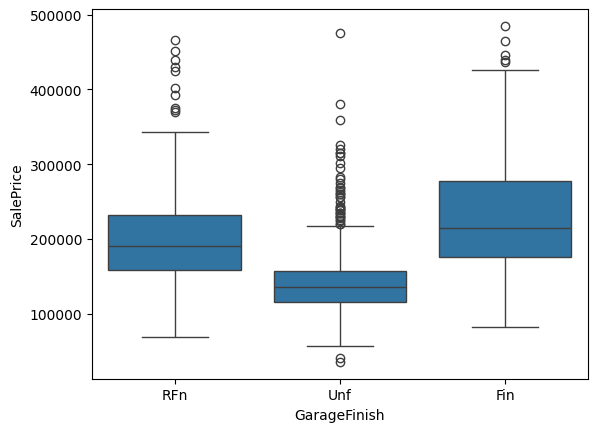

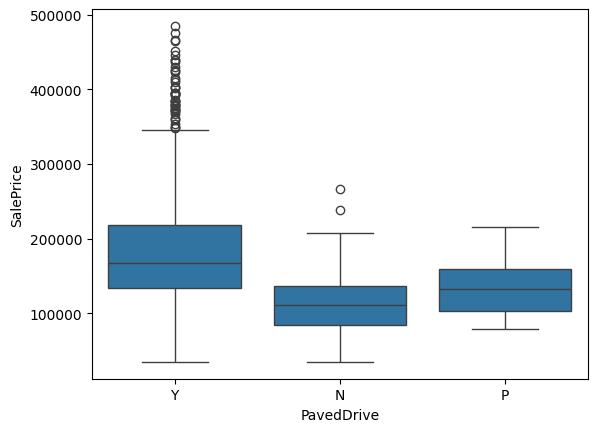

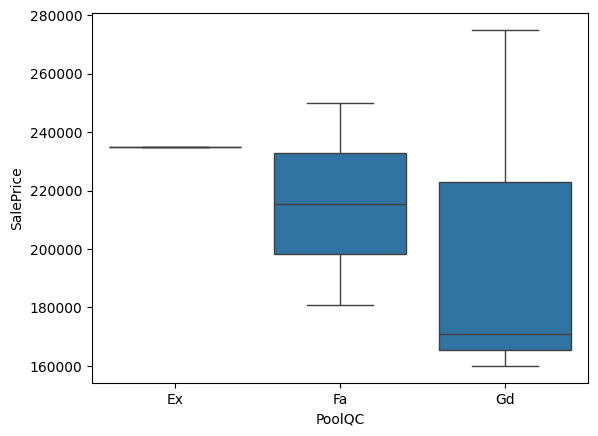

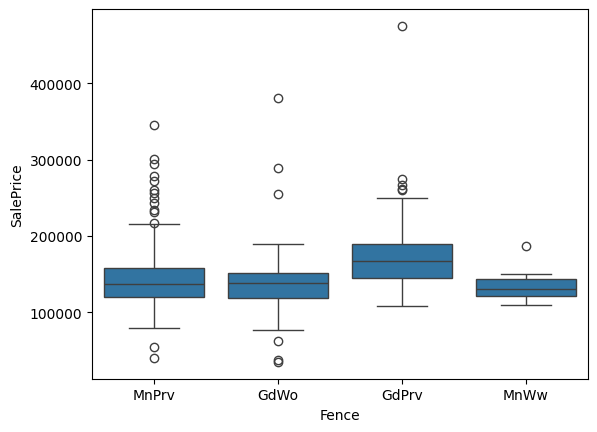

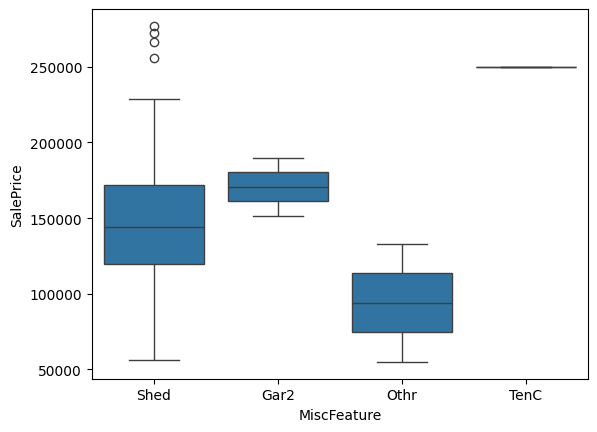

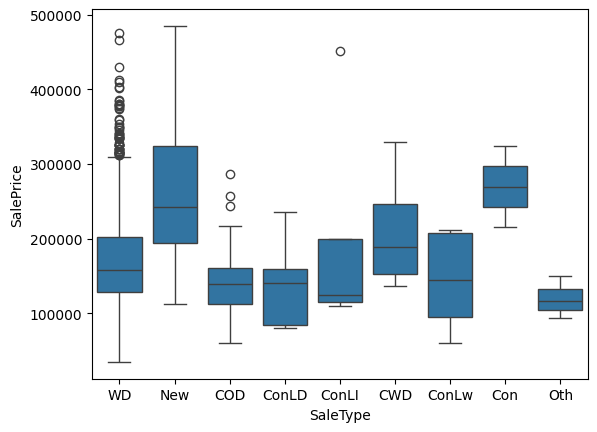

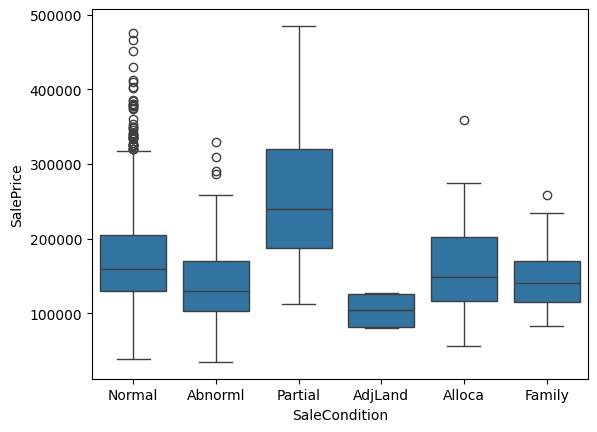

In [17]:
tableau_colonne_catégorique = ['MSSubClass', 'MSZoning', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

for colonne in tableau_colonne_catégorique:
    sns.boxplot(data=maisons_clean, x=colonne, y='SalePrice')
    plt.show()

Trie des colonnes

In [18]:
maisons_clean = maisons_clean[['1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'YearBuilt', 'YearRemodAdd', 'OverallQual', 'OverallCond', 'MSSubClass', 'MSZoning', 'LandContour', 'LotConfig', 'LandSlope', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1','BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'Fence']]
maisons_clean

,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,YearBuilt,YearRemodAdd,OverallQual,OverallCond,MSSubClass,MSZoning,LandContour,LotConfig,LandSlope,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,Functional,GarageType,GarageFinish,Fence
0,856,854,1710,2,8,2003.0,2,548,2003,2003,7,5,60,RL,Lvl,Inside,Gtl,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,TA,PConc,Gd,TA,No,GLQ,Unf,Ex,Y,SBrkr,Typ,Attchd,RFn,NaN
1,1262,0,1262,2,6,1976.0,2,460,1976,1976,6,8,20,RL,Lvl,FR2,Gtl,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,NaN,TA,CBlock,Gd,TA,Gd,ALQ,Unf,Ex,Y,SBrkr,Typ,Attchd,RFn,NaN
2,920,866,1786,2,6,2001.0,2,608,2001,2002,7,5,60,RL,Lvl,Inside,Gtl,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,TA,PConc,Gd,TA,Mn,GLQ,Unf,Ex,Y,SBrkr,Typ,Attchd,RFn,NaN
3,961,756,1717,1,7,1998.0,3,642,1915,1970,7,5,70,RL,Lvl,Corner,Gtl,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,NaN,TA,BrkTil,TA,Gd,No,ALQ,Unf,Gd,Y,SBrkr,Typ,Detchd,Unf,NaN
4,1145,1053,2198,2,9,2000.0,3,836,2000,2000,8,5,60,RL,Lvl,FR2,Gtl,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,TA,PConc,Gd,TA,Av,GLQ,Unf,Ex,Y,SBrkr,Typ,Attchd,RFn,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694,1647,2,7,1999.0,2,460,1999,2000,6,5,60,RL,Lvl,Inside,Gtl,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,NaN,TA,PConc,Gd,TA,No,Unf,Unf,Ex,Y,SBrkr,Typ,Attchd,RFn,NaN
1456,2073,0,2073,2,7,1978.0,2,500,1978,1988,6,6,20,RL,Lvl,Inside,Gtl,Norm,1Fam,1Story,Gable,Plywood,Plywood,Stone,TA,CBlock,Gd,TA,No,ALQ,Rec,TA,Y,SBrkr,Min1,Attchd,Unf,MnPrv
1457,1188,1152,2340,2,9,1941.0,1,252,1941,2006,7,9,70,RL,Lvl,Inside,Gtl,Norm,1Fam,2Story,Gable,CemntBd,CmentBd,NaN,Gd,Stone,TA,Gd,No,GLQ,Unf,Ex,Y,SBrkr,Typ,Attchd,RFn,GdPrv
1458,1078,0,1078,1,5,1950.0,1,240,1950,1996,5,6,20,RL,Lvl,Inside,Gtl,Norm,1Fam,1Story,Hip,MetalSd,MetalSd,NaN,TA,CBlock,TA,TA,Mn,GLQ,Rec,Gd,Y,FuseA,Typ,Attchd,Unf,NaN


On enregistre l'age des maisons

In [19]:
maisons_clean['age_maisons'] = maisons['YrSold'] - maisons['YearBuilt']
maisons_clean

C:\Users\anase\AppData\Local\Temp\ipykernel_13336\2891394820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maisons_clean['age_maisons'] = maisons['YrSold'] - maisons['YearBuilt']


,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,YearBuilt,YearRemodAdd,OverallQual,OverallCond,MSSubClass,MSZoning,LandContour,LotConfig,LandSlope,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,Functional,GarageType,GarageFinish,Fence,age_maisons
0,856,854,1710,2,8,2003.0,2,548,2003,2003,7,5,60,RL,Lvl,Inside,Gtl,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,TA,PConc,Gd,TA,No,GLQ,Unf,Ex,Y,SBrkr,Typ,Attchd,RFn,NaN,5
1,1262,0,1262,2,6,1976.0,2,460,1976,1976,6,8,20,RL,Lvl,FR2,Gtl,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,NaN,TA,CBlock,Gd,TA,Gd,ALQ,Unf,Ex,Y,SBrkr,Typ,Attchd,RFn,NaN,31
2,920,866,1786,2,6,2001.0,2,608,2001,2002,7,5,60,RL,Lvl,Inside,Gtl,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,TA,PConc,Gd,TA,Mn,GLQ,Unf,Ex,Y,SBrkr,Typ,Attchd,RFn,NaN,7
3,961,756,1717,1,7,1998.0,3,642,1915,1970,7,5,70,RL,Lvl,Corner,Gtl,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,NaN,TA,BrkTil,TA,Gd,No,ALQ,Unf,Gd,Y,SBrkr,Typ,Detchd,Unf,NaN,91
4,1145,1053,2198,2,9,2000.0,3,836,2000,2000,8,5,60,RL,Lvl,FR2,Gtl,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,TA,PConc,Gd,TA,Av,GLQ,Unf,Ex,Y,SBrkr,Typ,Attchd,RFn,NaN,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694,1647,2,7,1999.0,2,460,1999,2000,6,5,60,RL,Lvl,Inside,Gtl,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,NaN,TA,PConc,Gd,TA,No,Unf,Unf,Ex,Y,SBrkr,Typ,Attchd,RFn,NaN,8
1456,2073,0,2073,2,7,1978.0,2,500,1978,1988,6,6,20,RL,Lvl,Inside,Gtl,Norm,1Fam,1Story,Gable,Plywood,Plywood,Stone,TA,CBlock,Gd,TA,No,ALQ,Rec,TA,Y,SBrkr,Min1,Attchd,Unf,MnPrv,32
1457,1188,1152,2340,2,9,1941.0,1,252,1941,2006,7,9,70,RL,Lvl,Inside,Gtl,Norm,1Fam,2Story,Gable,CemntBd,CmentBd,NaN,Gd,Stone,TA,Gd,No,GLQ,Unf,Ex,Y,SBrkr,Typ,Attchd,RFn,GdPrv,69
1458,1078,0,1078,1,5,1950.0,1,240,1950,1996,5,6,20,RL,Lvl,Inside,Gtl,Norm,1Fam,1Story,Hip,MetalSd,MetalSd,NaN,TA,CBlock,TA,TA,Mn,GLQ,Rec,Gd,Y,FuseA,Typ,Attchd,Unf,NaN,60


In [20]:
maisons_clean.isnull().sum()

1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
FullBath           0
TotRmsAbvGrd       0
GarageYrBlt       81
GarageCars         0
GarageArea         0
YearBuilt          0
YearRemodAdd       0
OverallQual        0
OverallCond        0
MSSubClass         0
MSZoning           0
LandContour        0
LotConfig          0
LandSlope          0
Condition1         0
BldgType           0
HouseStyle         0
RoofStyle          0
Exterior1st        0
Exterior2nd        0
MasVnrType       871
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
HeatingQC          0
CentralAir         0
Electrical         1
Functional         0
GarageType        81
GarageFinish      81
Fence           1171
age_maisons        0
dtype: int64

Vérifiez les types des colonnes pour savoir par comment remplacer les nan

In [21]:
maisons_clean['GarageYrBlt'].dtype
maisons_clean['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

Remplacer les valeurs de GarageYrBlt par une moyenne

In [22]:
maisons_clean['GarageYrBlt'].fillna(maisons_clean['GarageYrBlt'].mean(), inplace=True)

maisons_clean['GarageYrBlt'].isnull()

C:\Users\anase\AppData\Local\Temp\ipykernel_13336\3703367197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maisons_clean['GarageYrBlt'].fillna(maisons_clean['GarageYrBlt'].mean(), inplace=True)


0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: GarageYrBlt, Length: 1451, dtype: bool

In [23]:
maisons_clean['BsmtQual'].dtype
maisons_clean['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [24]:
hauteurSousSol = maisons_clean['BsmtQual'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
maisons_clean['BsmtQual'] = hauteurSousSol

C:\Users\anase\AppData\Local\Temp\ipykernel_13336\3216806252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maisons_clean['BsmtQual'] = hauteurSousSol


In [25]:
type(hauteurSousSol)


pandas.core.series.Series

In [26]:
maisons_clean['BsmtCond'].dtype
maisons_clean['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [27]:
maisons_clean['BsmtExposure'].dtype
maisons_clean['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [28]:
maisons_clean['BsmtFinType1'].dtype
maisons_clean['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [29]:
maisons_clean['BsmtFinType2'].dtype
maisons_clean['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [30]:
maisons_clean['Electrical'].dtype
maisons_clean['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [31]:
maisons_clean['GarageType'].dtype
maisons_clean['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [32]:
maisons_clean['Fence'].dtype
maisons_clean['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

# Remplacement des données par des chiffres

In [33]:
# remplacer les nan par 0
maisons_clean.replace(np.nan, 0, inplace=True)
maisons_clean.replace( {'Brk Cmn': 0}, inplace=True ) # remplacer les Brk Cmn par 0 car il n'ai pas dans le bloc not

hauteurSousSol = maisons_clean['BsmtQual'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
maisons_clean['BsmtQual'] = hauteurSousSol

etatSousSol = maisons_clean['BsmtCond'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
maisons_clean['BsmtCond'] = etatSousSol

expositionSousSol = maisons_clean['BsmtExposure'].replace({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0})
maisons_clean['BsmtExposure'] = expositionSousSol

type1SousSol = maisons_clean['BsmtFinType1'].replace({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0})
maisons_clean['BsmtFinType1'] = type1SousSol

type2SousSol = maisons_clean['BsmtFinType2'].replace({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0})
maisons_clean['BsmtFinType2'] = type2SousSol

electricite = maisons_clean['Electrical'].replace({'SBrkr': 5, 'FuseA': 4, 'FuseF': 3, 'FuseP': 2, 'Mix': 1})
maisons_clean['Electrical'] = electricite

garageType = maisons_clean['GarageType'].replace({'2Types': 6, 'Attchd': 5, 'Basment': 4, 'BuiltIn': 3, 'CarPort': 2, 'Detchd': 1, 'NA': 0})
maisons_clean['GarageType'] = garageType

garageFinish = maisons_clean['GarageFinish'].replace({'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0})
maisons_clean['GarageFinish'] = garageFinish

cloture = maisons_clean['Fence'].replace({'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0, 'NaN': 0})
maisons_clean['Fence'] = cloture

# MSZoning
zoneAlentour = maisons_clean['MSZoning'].replace({'A': 7, 'C': 6, 'FV': 5, 'I': 4, 'RH': 3, 'RL': 2, 'RP': 1, 'RM': 0, 'C (all)': 6})
maisons_clean['MSZoning'] = zoneAlentour

# LandContour
contourTerrain = maisons_clean['LandContour'].replace({'Lvl': 3, 'Bnk': 2, 'HLS': 1, 'Low': 0})
maisons_clean['LandContour'] = contourTerrain

# LotConfig
configurationTerrain = maisons_clean['LotConfig'].replace({'Inside': 4, 'Corner': 3, 'CulDSac': 2, 'FR2': 1, 'FR3': 0})
maisons_clean['LotConfig'] = configurationTerrain

# LandSlope
penteTerrain = maisons_clean['LandSlope'].replace({'Gtl': 2, 'Mod': 1, 'Sev': 0})
maisons_clean['LandSlope'] = penteTerrain

# Condition1
condition1 = maisons_clean['Condition1'].replace({'Artery': 8, 'Feedr': 7, 'Norm': 6, 'RRNn': 5, 'RRAn': 4, 'PosN': 3, 'PosA': 2, 'RRNe': 1, 'RRAe': 0})
maisons_clean['Condition1'] = condition1

# BldgType
typeBatiment = maisons_clean['BldgType'].replace({'1Fam': 4, '2fmCon': 3, 'Duplex': 2, 'TwnhsE': 1, 'Twnhs': 0})
maisons_clean['BldgType'] = typeBatiment

# HouseStyle
styleMaison = maisons_clean['HouseStyle'].replace({'1Story': 8, '1.5Fin': 7, '1.5Unf': 6, '2Story': 5, '2.5Fin': 4, '2.5Unf': 3, 'SFoyer': 2, 'SLvl': 1})
maisons_clean['HouseStyle'] = styleMaison

# RoofStyle
styleToit = maisons_clean['RoofStyle'].replace({'Flat': 5, 'Gable': 4, 'Gambrel': 3, 'Hip': 2, 'Mansard': 1, 'Shed': 0})
maisons_clean['RoofStyle'] = styleToit

# Exterior1st
revetementExterieur1 = maisons_clean['Exterior1st'].replace({'AsbShng': 16, 'AsphShn': 15, 'BrkComm': 14, 'BrkFace': 13, 'CBlock': 12, 'CemntBd': 11, 'HdBoard': 10, 'ImStucc': 9, 'MetalSd': 8, 'Other': 7, 'Plywood': 6, 'PreCast': 5, 'Stone': 4,  'Stucco': 3, 'Wd Sdng': 2, 'WdShing': 1, 'VinylSd': 0})
maisons_clean['Exterior1st'] = revetementExterieur1

# Exterior2nd
revetementExterieur2 = maisons_clean['Exterior2nd'].replace({'AsbShng': 16, 'AsphShn': 15, 'BrkComm': 14, 'BrkFace': 13, 'CBlock': 12, 'CemntBd': 11, 'HdBoard': 10, 'ImStucc': 9, 'MetalSd': 8, 'Other': 7, 'Plywood': 6, 'PreCast': 5, 'Stone': 4,  'Stucco': 3, 'Wd Shng': 2, 'Wd Sdng': 2, 'WdShing': 1, 'VinylSd': 0, 'CmentBd': 0})
maisons_clean['Exterior2nd'] = revetementExterieur2

# MasVnrType
revetementPierre = maisons_clean['MasVnrType'].replace({'BrkCmn': 4, 'BrkFace': 3, 'CBlock': 2, 'Stone': 1, 'None': 0})
maisons_clean['MasVnrType'] = revetementPierre

# ExterCond
etatExterieur = maisons_clean['ExterCond'].replace({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
maisons_clean['ExterCond'] = etatExterieur

# Foundation
fondation = maisons_clean['Foundation'].replace({'BrkTil': 5, 'CBlock': 4, 'PConc': 3, 'Slab': 2, 'Stone': 1, 'Wood': 0})
maisons_clean['Foundation'] = fondation

# HeatingQC
chauffage = maisons_clean['HeatingQC'].replace({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
maisons_clean['HeatingQC'] = chauffage

# CentralAir
airCentral = maisons_clean['CentralAir'].replace({'Y': 1, 'N': 0})
maisons_clean['CentralAir'] = airCentral

# Functional
fonctionnalite = maisons_clean['Functional'].replace({'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0})
maisons_clean['Functional'] = fonctionnalite

C:\Users\anase\AppData\Local\Temp\ipykernel_13336\3425567638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maisons_clean.replace(np.nan, 0, inplace=True)
C:\Users\anase\AppData\Local\Temp\ipykernel_13336\3425567638.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maisons_clean.replace( {'Brk Cmn': 0}, inplace=True ) # remplacer les Brk Cmn par 0 car il n'ai pas dans le bloc not
C:\Users\anase\AppData\Local\Temp\ipykernel_13336\3425567638.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

# scal toutes les variables numériques sauf GarageYrBlt car c'est une date

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [35]:
# On récupère les colonnes numériques de maisons_clean
maisons_clean_num = maisons_clean.select_dtypes(include=np.number)

# On scale les colonnes numériques avec le StandardScaler
for colonne in maisons_clean_num.columns:
    if colonne != 'GarageYrBlt':
      maisons_clean_num[colonne] = scaler.fit_transform(maisons_clean_num[[colonne]])

In [36]:
maisons_clean_num

,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,YearBuilt,YearRemodAdd,OverallQual,OverallCond,MSSubClass,MSZoning,LandContour,LotConfig,LandSlope,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,Functional,GarageType,GarageFinish,Fence,age_maisons
0,-0.792371,1.189859,0.403744,0.811664,0.944044,2003.0,0.323713,0.365067,1.057954,0.884031,0.675997,-0.518592,0.071709,0.121061,0.305845,0.535904,0.224848,0.035212,0.417832,-0.736383,0.484775,-1.020995,-0.954918,1.418157,-0.237484,-0.840007,0.596224,0.118254,-0.584948,1.170971,-0.276708,0.896149,0.264687,0.275061,0.236197,0.769978,0.327504,-0.470555,-1.050031
1,0.277570,-0.797681,-0.479873,0.811664,-0.308638,1976.0,0.323713,-0.050083,0.163301,-0.423838,-0.058188,2.172027,-0.872058,0.121061,0.305845,-3.352080,0.224848,1.170590,0.417832,0.797337,0.484775,0.719344,0.901813,-0.752461,-0.237484,0.543478,0.596224,0.118254,2.250551,0.695970,-0.276708,0.896149,0.264687,0.275061,0.236197,0.769978,0.327504,-0.470555,-0.189953
2,-0.623711,1.217787,0.553643,0.811664,-0.308638,2001.0,0.323713,0.648124,0.991683,0.835591,0.675997,-0.518592,0.071709,0.121061,0.305845,0.535904,0.224848,0.035212,0.417832,-0.736383,0.484775,-1.020995,-0.954918,1.418157,-0.237484,-0.840007,0.596224,0.118254,0.360218,1.170971,-0.276708,0.896149,0.264687,0.275061,0.236197,0.769978,0.327504,-0.470555,-0.983872
3,-0.515662,0.961781,0.417550,-1.025660,0.317703,1998.0,1.669579,0.808522,-1.857950,-0.714475,0.675997,-0.518592,0.307651,0.121061,0.305845,-0.760091,0.224848,0.035212,0.417832,-0.736383,0.484775,-0.585910,-0.490735,-0.752461,-0.237484,1.926964,-0.551151,1.924434,-0.584948,0.695970,-0.276708,-0.145768,0.264687,0.275061,0.236197,-1.296112,-0.795921,-0.470555,1.794843
4,-0.030763,1.652997,1.366256,0.811664,1.570384,2000.0,1.669579,1.723739,0.958548,0.738712,1.410181,-0.518592,0.071709,0.121061,0.305845,-3.352080,0.224848,0.035212,0.417832,-0.736383,0.484775,-1.020995,-0.954918,1.418157,-0.237484,-0.840007,0.596224,0.118254,1.305385,1.170971,-0.276708,0.896149,0.264687,0.275061,0.236197,0.769978,0.327504,-0.470555,-0.950792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.536745,0.817486,0.279485,0.811664,0.317703,1999.0,0.323713,-0.050083,0.925413,0.738712,-0.058188,-0.518592,0.071709,0.121061,0.305845,0.535904,0.224848,0.035212,0.417832,-0.736383,0.484775,-1.020995,-0.954918,-0.752461,-0.237484,-0.840007,0.596224,0.118254,-0.584948,-1.204035,-0.276708,0.896149,0.264687,0.275061,0.236197,0.769978,0.327504,-0.470555,-0.950792
1456,2.414816,-0.797681,1.119711,0.811664,0.317703,1978.0,0.323713,0.138622,0.229572,0.157437,-0.058188,0.378281,-0.872058,0.121061,0.305845,0.535904,0.224848,0.035212,0.417832,0.797337,0.484775,0.284259,0.437631,-0.028922,-0.237484,0.543478,0.596224,0.118254,-0.584948,0.695970,1.972610,-1.187685,0.264687,0.275061,-1.266970,0.769978,-0.795921,2.018298,-0.156873
1457,0.082556,1.883403,1.646331,0.811664,1.570384,1941.0,-1.022154,-1.031346,-0.996433,1.029349,0.675997,3.068900,0.307651,0.121061,0.305845,0.535904,0.224848,0.035212,0.417832,-0.736383,0.484775,1.371971,-0.954918,-0.752461,2.610363,-3.606978,-0.551151,1.924434,-0.584948,1.170971,-0.276708,0.896149,0.264687,0.275061,0.236197,0.769978,0.327504,2.847915,1.067084
1458,-0.207330,-0.797681,-0.842788,-1.025660,-0.934979,1950.0,-1.022154,-1.087957,-0.698216,0.544954,-0.792373,0.378281,-0.872058,0.121061,0.305845,0.535904,0.224848,0.035212,0.417832,0.797337,-1.928292,0.719344,0.901813,-0.752461,-0.237484,0.543478,-0.551151,0.118254,0.360218,1.170971,1.972610,-0.145768,0.264687,-2.129241,0.236197,0.769978,-0.795921,-0.470555,0.769365


In [37]:
maisons_clean

,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,YearBuilt,YearRemodAdd,OverallQual,OverallCond,MSSubClass,MSZoning,LandContour,LotConfig,LandSlope,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,Functional,GarageType,GarageFinish,Fence,age_maisons
0,856,854,1710,2,8,2003.0,2,548,2003,2003,7,5,60,2,3,4,2,6,4,5,4,0,0,3,2,3,4.0,3,1,6,1,4,1,5,7,5,2,0,5
1,1262,0,1262,2,6,1976.0,2,460,1976,1976,6,8,20,2,3,1,2,7,4,8,4,8,8,0,2,4,4.0,3,4,5,1,4,1,5,7,5,2,0,31
2,920,866,1786,2,6,2001.0,2,608,2001,2002,7,5,60,2,3,4,2,6,4,5,4,0,0,3,2,3,4.0,3,2,6,1,4,1,5,7,5,2,0,7
3,961,756,1717,1,7,1998.0,3,642,1915,1970,7,5,70,2,3,3,2,6,4,5,4,2,2,0,2,5,3.0,4,1,5,1,3,1,5,7,1,1,0,91
4,1145,1053,2198,2,9,2000.0,3,836,2000,2000,8,5,60,2,3,1,2,6,4,5,4,0,0,3,2,3,4.0,3,3,6,1,4,1,5,7,5,2,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694,1647,2,7,1999.0,2,460,1999,2000,6,5,60,2,3,4,2,6,4,5,4,0,0,0,2,3,4.0,3,1,1,1,4,1,5,7,5,2,0,8
1456,2073,0,2073,2,7,1978.0,2,500,1978,1988,6,6,20,2,3,4,2,6,4,8,4,6,6,1,2,4,4.0,3,1,5,3,2,1,5,6,5,1,3,32
1457,1188,1152,2340,2,9,1941.0,1,252,1941,2006,7,9,70,2,3,4,2,6,4,5,4,11,0,0,3,1,3.0,4,1,6,1,4,1,5,7,5,2,4,69
1458,1078,0,1078,1,5,1950.0,1,240,1950,1996,5,6,20,2,3,4,2,6,4,8,2,8,8,0,2,4,3.0,3,2,6,3,3,1,4,7,5,1,0,60


In [38]:
# afficher les colonnes numérique de maisons_clean pour les remplacer par les colonnes numériques de maisons_clean_num
maisons_clean.select_dtypes(include=np.number)

,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,YearBuilt,YearRemodAdd,OverallQual,OverallCond,MSSubClass,MSZoning,LandContour,LotConfig,LandSlope,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,Functional,GarageType,GarageFinish,Fence,age_maisons
0,856,854,1710,2,8,2003.0,2,548,2003,2003,7,5,60,2,3,4,2,6,4,5,4,0,0,3,2,3,4.0,3,1,6,1,4,1,5,7,5,2,0,5
1,1262,0,1262,2,6,1976.0,2,460,1976,1976,6,8,20,2,3,1,2,7,4,8,4,8,8,0,2,4,4.0,3,4,5,1,4,1,5,7,5,2,0,31
2,920,866,1786,2,6,2001.0,2,608,2001,2002,7,5,60,2,3,4,2,6,4,5,4,0,0,3,2,3,4.0,3,2,6,1,4,1,5,7,5,2,0,7
3,961,756,1717,1,7,1998.0,3,642,1915,1970,7,5,70,2,3,3,2,6,4,5,4,2,2,0,2,5,3.0,4,1,5,1,3,1,5,7,1,1,0,91
4,1145,1053,2198,2,9,2000.0,3,836,2000,2000,8,5,60,2,3,1,2,6,4,5,4,0,0,3,2,3,4.0,3,3,6,1,4,1,5,7,5,2,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694,1647,2,7,1999.0,2,460,1999,2000,6,5,60,2,3,4,2,6,4,5,4,0,0,0,2,3,4.0,3,1,1,1,4,1,5,7,5,2,0,8
1456,2073,0,2073,2,7,1978.0,2,500,1978,1988,6,6,20,2,3,4,2,6,4,8,4,6,6,1,2,4,4.0,3,1,5,3,2,1,5,6,5,1,3,32
1457,1188,1152,2340,2,9,1941.0,1,252,1941,2006,7,9,70,2,3,4,2,6,4,5,4,11,0,0,3,1,3.0,4,1,6,1,4,1,5,7,5,2,4,69
1458,1078,0,1078,1,5,1950.0,1,240,1950,1996,5,6,20,2,3,4,2,6,4,8,2,8,8,0,2,4,3.0,3,2,6,3,3,1,4,7,5,1,0,60


In [39]:
# Remplacer les nan de fance par 0
maisons_clean['Fence'] = maisons_clean['Fence'].fillna(0)
maisons_clean

C:\Users\anase\AppData\Local\Temp\ipykernel_13336\1249824277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maisons_clean['Fence'] = maisons_clean['Fence'].fillna(0)


,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,YearBuilt,YearRemodAdd,OverallQual,OverallCond,MSSubClass,MSZoning,LandContour,LotConfig,LandSlope,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,Functional,GarageType,GarageFinish,Fence,age_maisons
0,856,854,1710,2,8,2003.0,2,548,2003,2003,7,5,60,2,3,4,2,6,4,5,4,0,0,3,2,3,4.0,3,1,6,1,4,1,5,7,5,2,0,5
1,1262,0,1262,2,6,1976.0,2,460,1976,1976,6,8,20,2,3,1,2,7,4,8,4,8,8,0,2,4,4.0,3,4,5,1,4,1,5,7,5,2,0,31
2,920,866,1786,2,6,2001.0,2,608,2001,2002,7,5,60,2,3,4,2,6,4,5,4,0,0,3,2,3,4.0,3,2,6,1,4,1,5,7,5,2,0,7
3,961,756,1717,1,7,1998.0,3,642,1915,1970,7,5,70,2,3,3,2,6,4,5,4,2,2,0,2,5,3.0,4,1,5,1,3,1,5,7,1,1,0,91
4,1145,1053,2198,2,9,2000.0,3,836,2000,2000,8,5,60,2,3,1,2,6,4,5,4,0,0,3,2,3,4.0,3,3,6,1,4,1,5,7,5,2,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694,1647,2,7,1999.0,2,460,1999,2000,6,5,60,2,3,4,2,6,4,5,4,0,0,0,2,3,4.0,3,1,1,1,4,1,5,7,5,2,0,8
1456,2073,0,2073,2,7,1978.0,2,500,1978,1988,6,6,20,2,3,4,2,6,4,8,4,6,6,1,2,4,4.0,3,1,5,3,2,1,5,6,5,1,3,32
1457,1188,1152,2340,2,9,1941.0,1,252,1941,2006,7,9,70,2,3,4,2,6,4,5,4,11,0,0,3,1,3.0,4,1,6,1,4,1,5,7,5,2,4,69
1458,1078,0,1078,1,5,1950.0,1,240,1950,1996,5,6,20,2,3,4,2,6,4,8,2,8,8,0,2,4,3.0,3,2,6,3,3,1,4,7,5,1,0,60


remplacer les colonnes numérique de maisons_clean par les colonnes numériques de maisons_clean_num


In [40]:
for colonne in maisons_clean_num.columns:
    maisons_clean[colonne] = maisons_clean_num[colonne]

C:\Users\anase\AppData\Local\Temp\ipykernel_13336\673474045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maisons_clean[colonne] = maisons_clean_num[colonne]


In [41]:
maisons_clean

,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,YearBuilt,YearRemodAdd,OverallQual,OverallCond,MSSubClass,MSZoning,LandContour,LotConfig,LandSlope,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,Functional,GarageType,GarageFinish,Fence,age_maisons
0,-0.792371,1.189859,0.403744,0.811664,0.944044,2003.0,0.323713,0.365067,1.057954,0.884031,0.675997,-0.518592,0.071709,0.121061,0.305845,0.535904,0.224848,0.035212,0.417832,-0.736383,0.484775,-1.020995,-0.954918,1.418157,-0.237484,-0.840007,0.596224,0.118254,-0.584948,1.170971,-0.276708,0.896149,0.264687,0.275061,0.236197,0.769978,0.327504,-0.470555,-1.050031
1,0.277570,-0.797681,-0.479873,0.811664,-0.308638,1976.0,0.323713,-0.050083,0.163301,-0.423838,-0.058188,2.172027,-0.872058,0.121061,0.305845,-3.352080,0.224848,1.170590,0.417832,0.797337,0.484775,0.719344,0.901813,-0.752461,-0.237484,0.543478,0.596224,0.118254,2.250551,0.695970,-0.276708,0.896149,0.264687,0.275061,0.236197,0.769978,0.327504,-0.470555,-0.189953
2,-0.623711,1.217787,0.553643,0.811664,-0.308638,2001.0,0.323713,0.648124,0.991683,0.835591,0.675997,-0.518592,0.071709,0.121061,0.305845,0.535904,0.224848,0.035212,0.417832,-0.736383,0.484775,-1.020995,-0.954918,1.418157,-0.237484,-0.840007,0.596224,0.118254,0.360218,1.170971,-0.276708,0.896149,0.264687,0.275061,0.236197,0.769978,0.327504,-0.470555,-0.983872
3,-0.515662,0.961781,0.417550,-1.025660,0.317703,1998.0,1.669579,0.808522,-1.857950,-0.714475,0.675997,-0.518592,0.307651,0.121061,0.305845,-0.760091,0.224848,0.035212,0.417832,-0.736383,0.484775,-0.585910,-0.490735,-0.752461,-0.237484,1.926964,-0.551151,1.924434,-0.584948,0.695970,-0.276708,-0.145768,0.264687,0.275061,0.236197,-1.296112,-0.795921,-0.470555,1.794843
4,-0.030763,1.652997,1.366256,0.811664,1.570384,2000.0,1.669579,1.723739,0.958548,0.738712,1.410181,-0.518592,0.071709,0.121061,0.305845,-3.352080,0.224848,0.035212,0.417832,-0.736383,0.484775,-1.020995,-0.954918,1.418157,-0.237484,-0.840007,0.596224,0.118254,1.305385,1.170971,-0.276708,0.896149,0.264687,0.275061,0.236197,0.769978,0.327504,-0.470555,-0.950792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.536745,0.817486,0.279485,0.811664,0.317703,1999.0,0.323713,-0.050083,0.925413,0.738712,-0.058188,-0.518592,0.071709,0.121061,0.305845,0.535904,0.224848,0.035212,0.417832,-0.736383,0.484775,-1.020995,-0.954918,-0.752461,-0.237484,-0.840007,0.596224,0.118254,-0.584948,-1.204035,-0.276708,0.896149,0.264687,0.275061,0.236197,0.769978,0.327504,-0.470555,-0.950792
1456,2.414816,-0.797681,1.119711,0.811664,0.317703,1978.0,0.323713,0.138622,0.229572,0.157437,-0.058188,0.378281,-0.872058,0.121061,0.305845,0.535904,0.224848,0.035212,0.417832,0.797337,0.484775,0.284259,0.437631,-0.028922,-0.237484,0.543478,0.596224,0.118254,-0.584948,0.695970,1.972610,-1.187685,0.264687,0.275061,-1.266970,0.769978,-0.795921,2.018298,-0.156873
1457,0.082556,1.883403,1.646331,0.811664,1.570384,1941.0,-1.022154,-1.031346,-0.996433,1.029349,0.675997,3.068900,0.307651,0.121061,0.305845,0.535904,0.224848,0.035212,0.417832,-0.736383,0.484775,1.371971,-0.954918,-0.752461,2.610363,-3.606978,-0.551151,1.924434,-0.584948,1.170971,-0.276708,0.896149,0.264687,0.275061,0.236197,0.769978,0.327504,2.847915,1.067084
1458,-0.207330,-0.797681,-0.842788,-1.025660,-0.934979,1950.0,-1.022154,-1.087957,-0.698216,0.544954,-0.792373,0.378281,-0.872058,0.121061,0.305845,0.535904,0.224848,0.035212,0.417832,0.797337,-1.928292,0.719344,0.901813,-0.752461,-0.237484,0.543478,-0.551151,0.118254,0.360218,1.170971,1.972610,-0.145768,0.264687,-2.129241,0.236197,0.769978,-0.795921,-0.470555,0.769365


#### Selection des variables
- Séparer les features et les labels dans deux variables X et Y, X contiendra les colonnes que vous avez selectionné d'après vos analyses. Y contiendra la colonne 'SalePrice'.
- Préparer les données selectionnées pour le modèle de machine learning : Encodage des variables catégorielle et scaling des données quantitatives

In [42]:
# Séparation des données en deux variables X pour les features et Y pour le label
X = maisons_clean
Y = maisons['SalePrice']

X


,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,YearBuilt,YearRemodAdd,OverallQual,OverallCond,MSSubClass,MSZoning,LandContour,LotConfig,LandSlope,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,Functional,GarageType,GarageFinish,Fence,age_maisons
0,-0.792371,1.189859,0.403744,0.811664,0.944044,2003.0,0.323713,0.365067,1.057954,0.884031,0.675997,-0.518592,0.071709,0.121061,0.305845,0.535904,0.224848,0.035212,0.417832,-0.736383,0.484775,-1.020995,-0.954918,1.418157,-0.237484,-0.840007,0.596224,0.118254,-0.584948,1.170971,-0.276708,0.896149,0.264687,0.275061,0.236197,0.769978,0.327504,-0.470555,-1.050031
1,0.277570,-0.797681,-0.479873,0.811664,-0.308638,1976.0,0.323713,-0.050083,0.163301,-0.423838,-0.058188,2.172027,-0.872058,0.121061,0.305845,-3.352080,0.224848,1.170590,0.417832,0.797337,0.484775,0.719344,0.901813,-0.752461,-0.237484,0.543478,0.596224,0.118254,2.250551,0.695970,-0.276708,0.896149,0.264687,0.275061,0.236197,0.769978,0.327504,-0.470555,-0.189953
2,-0.623711,1.217787,0.553643,0.811664,-0.308638,2001.0,0.323713,0.648124,0.991683,0.835591,0.675997,-0.518592,0.071709,0.121061,0.305845,0.535904,0.224848,0.035212,0.417832,-0.736383,0.484775,-1.020995,-0.954918,1.418157,-0.237484,-0.840007,0.596224,0.118254,0.360218,1.170971,-0.276708,0.896149,0.264687,0.275061,0.236197,0.769978,0.327504,-0.470555,-0.983872
3,-0.515662,0.961781,0.417550,-1.025660,0.317703,1998.0,1.669579,0.808522,-1.857950,-0.714475,0.675997,-0.518592,0.307651,0.121061,0.305845,-0.760091,0.224848,0.035212,0.417832,-0.736383,0.484775,-0.585910,-0.490735,-0.752461,-0.237484,1.926964,-0.551151,1.924434,-0.584948,0.695970,-0.276708,-0.145768,0.264687,0.275061,0.236197,-1.296112,-0.795921,-0.470555,1.794843
4,-0.030763,1.652997,1.366256,0.811664,1.570384,2000.0,1.669579,1.723739,0.958548,0.738712,1.410181,-0.518592,0.071709,0.121061,0.305845,-3.352080,0.224848,0.035212,0.417832,-0.736383,0.484775,-1.020995,-0.954918,1.418157,-0.237484,-0.840007,0.596224,0.118254,1.305385,1.170971,-0.276708,0.896149,0.264687,0.275061,0.236197,0.769978,0.327504,-0.470555,-0.950792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.536745,0.817486,0.279485,0.811664,0.317703,1999.0,0.323713,-0.050083,0.925413,0.738712,-0.058188,-0.518592,0.071709,0.121061,0.305845,0.535904,0.224848,0.035212,0.417832,-0.736383,0.484775,-1.020995,-0.954918,-0.752461,-0.237484,-0.840007,0.596224,0.118254,-0.584948,-1.204035,-0.276708,0.896149,0.264687,0.275061,0.236197,0.769978,0.327504,-0.470555,-0.950792
1456,2.414816,-0.797681,1.119711,0.811664,0.317703,1978.0,0.323713,0.138622,0.229572,0.157437,-0.058188,0.378281,-0.872058,0.121061,0.305845,0.535904,0.224848,0.035212,0.417832,0.797337,0.484775,0.284259,0.437631,-0.028922,-0.237484,0.543478,0.596224,0.118254,-0.584948,0.695970,1.972610,-1.187685,0.264687,0.275061,-1.266970,0.769978,-0.795921,2.018298,-0.156873
1457,0.082556,1.883403,1.646331,0.811664,1.570384,1941.0,-1.022154,-1.031346,-0.996433,1.029349,0.675997,3.068900,0.307651,0.121061,0.305845,0.535904,0.224848,0.035212,0.417832,-0.736383,0.484775,1.371971,-0.954918,-0.752461,2.610363,-3.606978,-0.551151,1.924434,-0.584948,1.170971,-0.276708,0.896149,0.264687,0.275061,0.236197,0.769978,0.327504,2.847915,1.067084
1458,-0.207330,-0.797681,-0.842788,-1.025660,-0.934979,1950.0,-1.022154,-1.087957,-0.698216,0.544954,-0.792373,0.378281,-0.872058,0.121061,0.305845,0.535904,0.224848,0.035212,0.417832,0.797337,-1.928292,0.719344,0.901813,-0.752461,-0.237484,0.543478,-0.551151,0.118254,0.360218,1.170971,1.972610,-0.145768,0.264687,-2.129241,0.236197,0.769978,-0.795921,-0.470555,0.769365


- Séparer les données en deux sous ensembles 75%-25% pour l'entraînement et le test du modèle de machine learning avec la methode train_test_split de sklearn.

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75, random_state=42)

#### Entraîner un modèle de regression linéaire
- Importer le modèle LinearRegression de sklearn et proceder à l'entrainement sur l'ensemble d'entrainement

In [44]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_train, Y_train)

LinearRegression()

#### Evaluer le modèle

- Faire les prédictions sur l'ensemble de données de test
- calculer R2 score pour évaluer votre modèle

In [45]:
from sklearn.metrics import r2_score

predictions1 = model1.predict(X_test)
model_score = r2_score(predictions1, Y_test)
print(f"Votre modèle est précis {str(round(model_score,2)*100)} %")

Votre modèle est précis 82.0 %


- Essayer avec un autre algorithme.

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
model2 = GradientBoostingRegressor()
model2.fit(X_train, Y_train)
predictions2 = model2.predict(X_test)
model_score2 = r2_score(predictions2, Y_test)
print(f"Votre modèle est précis {str(round(model_score2,2)*100)} %")

Votre modèle est précis 87.0 %


Quelles sont les features les plus importantes d'après l'entrainement du modèle ?

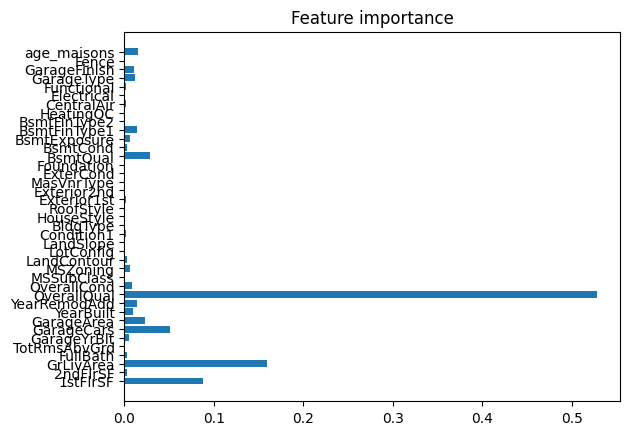

In [47]:
plt.barh(X_train.columns, model2.feature_importances_)
plt.title('Feature importance')
plt.show()

OverQual, GrLiveArea, 1stFirSF et GarageCars sont les 4 features les plus importantes, on remarque bien une grande différences par rapport aux autres colonnes